Here we'll first be loading the FC matrices and explore their structure

In [19]:
!pip install --upgrade numpy --user

  Using cached numpy-2.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.8.1 requires numpy<1.25.0,>=1.17.3, but you have numpy 2.0.1 which is incompatible.
You should consider upgrading via the '/sw/arch/RHEL8/EB_production/2022/software/Python/3.10.4-GCCcore-11.3.0/bin/python -m pip install --upgrade pip' command.


In [28]:
!pip install matplotlib==3.5.3

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
You should consider upgrading via the '/sw/arch/RHEL8/EB_production/2022/software/Python/3.10.4-GCCcore-11.3.0/bin/python -m pip install --upgrade pip' command.


In [29]:
!python -c "import numpy; print('NumPy:', numpy.__version__); import matplotlib; print('Matplotlib:', matplotlib.__version__)"

NumPy: 1.22.3
Matplotlib: 3.5.3


In [26]:
!pip uninstall -y matplotlib

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


In [27]:
!rm -rf ~/.local/lib/python3.10/site-packages/matplotlib
!rm -rf ~/.local/lib/python3.10/site-packages/mpl_toolkits

In [20]:
import numpy
print(numpy.__version__)




1.22.3


In [1]:
#using read_dataset from Datasets/FC/create_dataset.py to read the dataset
from Datasets.FC.create_dataset import read_dataset

In [2]:
dataset = read_dataset()

In [3]:
#ok, let's explore the data a bit more
#dataset is a list object of torch_geometric.data objects

#let's see the first element
print(dataset[0])

#it's a dictionary object, let's see the keys
print(dataset[0].keys())

#ok, let's see the values
print(dataset[0].values())

#it has 4 keys, 'x', 'edge_index', 'edge_attr' and 'y' where y=0 menas the patient is healthy and y=1 means the patient has Autism Spectrum Disorder (ASD)
"""graph = Data(x=ROI.reshape(-1,116).float(),
                     edge_index=G.indices().reshape(2,-1).long(),
                     edge_attr=G.values().reshape(-1,1).float(),
                     y=y.long())"""

#how much data do we have?
len(dataset)


Data(x=[116, 116], edge_index=[2, 1016], edge_attr=[1016, 1], y=[1])
['x', 'y', 'edge_attr', 'edge_index']
ValuesView({'x': tensor([[ 0.0000,  0.4543,  0.2477,  ...,  0.1753,  0.2247, -0.1751],
        [ 0.4543,  0.0000, -0.2204,  ..., -0.1947, -0.2258, -0.1434],
        [ 0.2477, -0.2204,  0.0000,  ..., -0.0521, -0.0804, -0.2025],
        ...,
        [ 0.1753, -0.1947, -0.0521,  ...,  0.0000,  0.6875, -0.1364],
        [ 0.2247, -0.2258, -0.0804,  ...,  0.6875,  0.0000,  0.0929],
        [-0.1751, -0.1434, -0.2025,  ..., -0.1364,  0.0929,  0.0000]]), 'edge_index': tensor([[  0,   0,   0,  ..., 114, 115, 115],
        [  1,  10,  12,  ..., 113,  94, 109]]), 'edge_attr': tensor([[0.4543],
        [0.5913],
        [0.4224],
        ...,
        [0.6875],
        [0.4846],
        [0.5437]]), 'y': tensor([0])})


1099

In [4]:
#set the seed
import torch
torch.manual_seed(0)

MODEL = "GAT"
DATASET = "FC"

from models.models_FC import GAT_framework as framework # import the model

gnn = framework(dataset)

print(gnn.model)
print(gnn.train_idx)

Net(
  (conv_layers): ModuleList(
    (0): GATConv(116, 128, heads=4)
    (1): GATConv(512, 128, heads=4)
    (2): GATConv(512, 128, heads=4)
    (3): GATConv(512, 128, heads=4)
    (4): GATConv(512, 128, heads=4)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm(512)
    (1): BatchNorm(512)
    (2): BatchNorm(512)
    (3): BatchNorm(512)
    (4): BatchNorm(512)
  )
  (lin1): Linear(512, 128, bias=True)
  (lin2): Linear(128, 2, bias=True)
  (bn1): BatchNorm(128)
  (bn2): BatchNorm(2)
)
tensor([217, 137, 426,  ..., 643, 205, 434])


/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [5]:
# gnn.iterate()

/home/tpelletreaudur/.local/lib/python3.10/site-packages/torch_geometric/warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch: 005, Loss: 0.255, Test Loss: 0.701, Train Acc: 0.619 Test Acc: 0.455
Epoch: 010, Loss: 0.169, Test Loss: 0.688, Train Acc: 0.959 Test Acc: 0.582
Epoch: 015, Loss: 0.142, Test Loss: 0.711, Train Acc: 0.999 Test Acc: 0.582
Epoch: 020, Loss: 0.128, Test Loss: 0.700, Train Acc: 0.998 Test Acc: 0.618
Epoch: 025, Loss: 0.123, Test Loss: 0.747, Train Acc: 1.000 Test Acc: 0.564
Epoch: 030, Loss: 0.119, Test Loss: 0.736, Train Acc: 0.999 Test Acc: 0.545
Epoch: 035, Loss: 0.103, Test Loss: 0.713, Train Acc: 1.000 Test Acc: 0.545
Epoch: 040, Loss: 0.097, Test Loss: 0.713, Train Acc: 1.000 Test Acc: 0.527
Epoch: 045, Loss: 0.092, Test Loss: 0.702, Train Acc: 1.000 Test Acc: 0.564
Epoch: 050, Loss: 0.089, Test Loss: 0.712, Train Acc: 1.000 Test Acc: 0.564
Epoch: 055, Loss: 0.087, Test Loss: 0.742, Train Acc: 1.000 Test Acc: 0.582
Epoch: 060, Loss: 0.088, Test Loss: 0.721, Train Acc: 0.999 Test Acc: 0.600
Epoch: 065, Loss: 0.080, Test Loss: 0.686, Train Acc: 1.000 Test Acc: 0.600
Epoch: 070, 

In [5]:
#gnn.train()

In [6]:
#save the model 
# gnn.save_model(path="models/"+DATASET+"_"+MODEL+"server2.pt")

Model saved in: models/FC_GATserver2.pt


In [5]:
#load the model
gnn.load_model(path="models/"+DATASET+"_"+MODEL+"server2.pt")

In [6]:
gnn.evaluate()

Test Loss: 0.898, Train Acc: 1.000 Test Acc: 0.618


In [7]:
train_features, test_features = gnn.evaluate_with_features2()

In [8]:
print(len(train_features[0]))
len(train_features), len(test_features)

8


(1044, 55)

In [11]:
import networkx as nx
def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Alternative metrics for disconnected graphs
        # Option 1: Use the average path length of the largest connected component
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        num_nodes = G.number_of_nodes()
        num_edges = G.number_of_edges()
        density = nx.density(G)
        avg_path_len = calculate_avg_path_length(G)
        num_cliques = len(list(nx.find_cliques(G)))
        num_triangles = sum(nx.triangles(G).values()) / 3
        num_squares = sum(nx.square_clustering(G).values()) / 4
        number_of_node_in_the_largest_fully_connected_component = len(max(nx.connected_components(G), key=len))
        #small_world = nx.algorithms.smallworld.sigma(G)

        properties.append((num_nodes, num_edges, density, avg_path_len, num_cliques, num_triangles, num_squares, number_of_node_in_the_largest_fully_connected_component)) #, small_world))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties = compute_graph_properties(selected_dataset)

In [ ]:
print(len(train_properties))
train_properties[0:5]



In [9]:
import pickle as pkl
# save the properties in a file
# with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "wb") as f:
#     pkl.dump(train_properties, f)

# with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "wb") as f:
#     pkl.dump(test_properties, f)

#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties.pkl", "rb") as f:
    train_properties = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties.pkl", "rb") as f:
    test_properties = pkl.load(f)

In [10]:
"""
The embeddings of GCN are like this:
return F.log_softmax(x7, dim=-1), (x1, x2, x3, x4, x5, x_global, x6, x7)
"""


import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
output_size = 1  # Predicting one property at a time
# Define the linear model
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Assume we have already evaluated to get features
# train_features, test_features = gnn.evaluate_with_features2()

# Extract x embeddings
train_x = np.array([feat[0] for feat in train_features])
test_x = np.array([feat[0] for feat in test_features])

# Extract 2, 3, 4, global, 5, 6, 7 embeddings
train_x2 = np.array([feat[1] for feat in train_features])
test_x2 = np.array([feat[1] for feat in test_features])

train_x3 = np.array([feat[2] for feat in train_features])
test_x3 = np.array([feat[2] for feat in test_features])

train_x4 = np.array([feat[3] for feat in train_features])
test_x4 = np.array([feat[3] for feat in test_features])

train_x5 = np.array([feat[4] for feat in train_features])
test_x5 = np.array([feat[4] for feat in test_features])

train_x_global = np.array([feat[5] for feat in train_features])
test_x_global = np.array([feat[5] for feat in test_features])

train_x6 = np.array([feat[6] for feat in train_features])
test_x6 = np.array([feat[6] for feat in test_features])

train_x7 = np.array([feat[7] for feat in train_features])
test_x7 = np.array([feat[7] for feat in test_features])

# Compute graph properties
# train_properties = compute_graph_properties(gnn.dataset[gnn.train_idx])
# test_properties = compute_graph_properties(gnn.dataset[gnn.test_idx])

# Convert to PyTorch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_x2 = torch.tensor(train_x2, dtype=torch.float32)
train_x3 = torch.tensor(train_x3, dtype=torch.float32)
train_x4 = torch.tensor(train_x4, dtype=torch.float32)
train_x5 = torch.tensor(train_x5, dtype=torch.float32)
train_x_global = torch.tensor(train_x_global, dtype=torch.float32)
train_x6 = torch.tensor(train_x6, dtype=torch.float32)
train_x7 = torch.tensor(train_x7, dtype=torch.float32)

test_x = torch.tensor(test_x, dtype=torch.float32)
test_x2 = torch.tensor(test_x2, dtype=torch.float32)
test_x3 = torch.tensor(test_x3, dtype=torch.float32)
test_x4 = torch.tensor(test_x4, dtype=torch.float32)
test_x5 = torch.tensor(test_x5, dtype=torch.float32)
test_x_global = torch.tensor(test_x_global, dtype=torch.float32)
test_x6 = torch.tensor(test_x6, dtype=torch.float32)
test_x7 = torch.tensor(test_x7, dtype=torch.float32)

train_y = torch.tensor(train_properties, dtype=torch.float32)
test_y = torch.tensor(test_properties, dtype=torch.float32)

# Train and evaluate a model for each graph property and each embedding
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings = [(train_x, test_x), (train_x2, test_x2), (train_x3, test_x3), (train_x4, test_x4), (train_x5, test_x5), (train_x_global, test_x_global), (train_x6, test_x6), (train_x7, test_x7)]
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error, r2_score

#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y[:, i].cpu().numpy()
            test_target = test_y[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "wb") as f:
    pkl.dump(results, f)

Epoch [1000/800000], Property: num_nodes, Loss: 6844.0854
Epoch [2000/800000], Property: num_nodes, Loss: 3919.4241
Epoch [3000/800000], Property: num_nodes, Loss: 2296.2935
Epoch [4000/800000], Property: num_nodes, Loss: 1381.7167
Epoch [5000/800000], Property: num_nodes, Loss: 870.4459
Epoch [6000/800000], Property: num_nodes, Loss: 585.7657
Epoch [7000/800000], Property: num_nodes, Loss: 421.5753
Epoch [8000/800000], Property: num_nodes, Loss: 318.8747
Epoch [9000/800000], Property: num_nodes, Loss: 249.0334
Epoch [10000/800000], Property: num_nodes, Loss: 199.0672
Epoch [11000/800000], Property: num_nodes, Loss: 162.2563
Epoch [12000/800000], Property: num_nodes, Loss: 134.5717
Epoch [13000/800000], Property: num_nodes, Loss: 113.4247
Epoch [14000/800000], Property: num_nodes, Loss: 97.1254
Epoch [15000/800000], Property: num_nodes, Loss: 84.5126
Epoch [16000/800000], Property: num_nodes, Loss: 74.7106
Epoch [17000/800000], Property: num_nodes, Loss: 67.0311
Epoch [18000/800000], P

Epoch [6000/800000], Property: num_edges, Loss: 131049.6250
Epoch [7000/800000], Property: num_edges, Loss: 116192.9219
Epoch [8000/800000], Property: num_edges, Loss: 103082.3125
Epoch [9000/800000], Property: num_edges, Loss: 91511.0469
Epoch [10000/800000], Property: num_edges, Loss: 81323.0703
Epoch [11000/800000], Property: num_edges, Loss: 72395.4844
Epoch [12000/800000], Property: num_edges, Loss: 64618.8516
Epoch [13000/800000], Property: num_edges, Loss: 57875.7031
Epoch [14000/800000], Property: num_edges, Loss: 52052.1445
Epoch [15000/800000], Property: num_edges, Loss: 47045.3867
Epoch [16000/800000], Property: num_edges, Loss: 42761.5156
Epoch [17000/800000], Property: num_edges, Loss: 39105.0195
Epoch [18000/800000], Property: num_edges, Loss: 35992.4453
Epoch [19000/800000], Property: num_edges, Loss: 33359.2578
Epoch [20000/800000], Property: num_edges, Loss: 31141.1133
Epoch [21000/800000], Property: num_edges, Loss: 29271.9355
Epoch [22000/800000], Property: num_edges

Epoch [142000/800000], Property: num_edges, Loss: 11487.2109
Epoch [143000/800000], Property: num_edges, Loss: 11479.0781
Epoch [144000/800000], Property: num_edges, Loss: 11471.1396
Epoch [145000/800000], Property: num_edges, Loss: 11463.3975
Epoch [146000/800000], Property: num_edges, Loss: 11455.8418
Epoch [147000/800000], Property: num_edges, Loss: 11448.4697
Epoch [148000/800000], Property: num_edges, Loss: 11441.2783
Epoch [149000/800000], Property: num_edges, Loss: 11434.2666
Epoch [150000/800000], Property: num_edges, Loss: 11427.4268
Epoch [151000/800000], Property: num_edges, Loss: 11420.7578
Epoch [152000/800000], Property: num_edges, Loss: 11414.2568
Epoch [153000/800000], Property: num_edges, Loss: 11407.9229
Epoch [154000/800000], Property: num_edges, Loss: 11401.7549
Epoch [155000/800000], Property: num_edges, Loss: 11395.7480
Epoch [156000/800000], Property: num_edges, Loss: 11389.8955
Epoch [157000/800000], Property: num_edges, Loss: 11384.1992
Epoch [158000/800000], P

Epoch [277000/800000], Property: num_edges, Loss: 11078.9902
Epoch [278000/800000], Property: num_edges, Loss: 11077.5850
Epoch [279000/800000], Property: num_edges, Loss: 11076.1875
Epoch [280000/800000], Property: num_edges, Loss: 11074.7998
Epoch [281000/800000], Property: num_edges, Loss: 11073.4199
Epoch [282000/800000], Property: num_edges, Loss: 11072.0469
Epoch [283000/800000], Property: num_edges, Loss: 11070.6846
Epoch [284000/800000], Property: num_edges, Loss: 11069.3311
Epoch [285000/800000], Property: num_edges, Loss: 11067.9863
Epoch [286000/800000], Property: num_edges, Loss: 11066.6514
Epoch [287000/800000], Property: num_edges, Loss: 11065.3242
Epoch [288000/800000], Property: num_edges, Loss: 11064.0049
Epoch [289000/800000], Property: num_edges, Loss: 11062.6963
Epoch [290000/800000], Property: num_edges, Loss: 11061.3955
Epoch [291000/800000], Property: num_edges, Loss: 11060.1035
Epoch [292000/800000], Property: num_edges, Loss: 11058.8184
Epoch [293000/800000], P

Epoch [412000/800000], Property: num_edges, Loss: 10969.7822
Epoch [413000/800000], Property: num_edges, Loss: 10969.5527
Epoch [414000/800000], Property: num_edges, Loss: 10969.3291
Epoch [415000/800000], Property: num_edges, Loss: 10969.1191
Epoch [416000/800000], Property: num_edges, Loss: 10968.9189
Epoch [417000/800000], Property: num_edges, Loss: 10968.7266
Epoch [418000/800000], Property: num_edges, Loss: 10968.5420
Epoch [419000/800000], Property: num_edges, Loss: 10968.3672
Epoch [420000/800000], Property: num_edges, Loss: 10968.1992
Epoch [421000/800000], Property: num_edges, Loss: 10968.0391
Epoch [422000/800000], Property: num_edges, Loss: 10967.8848
Epoch [423000/800000], Property: num_edges, Loss: 10967.7412
Epoch [424000/800000], Property: num_edges, Loss: 10967.6045
Epoch [425000/800000], Property: num_edges, Loss: 10967.4736
Epoch [426000/800000], Property: num_edges, Loss: 10967.3545
Epoch [427000/800000], Property: num_edges, Loss: 10967.2412
Epoch [428000/800000], P

Epoch [64000/800000], Property: num_cliques, Loss: 583.7518
Epoch [65000/800000], Property: num_cliques, Loss: 582.9766
Epoch [66000/800000], Property: num_cliques, Loss: 582.2100
Epoch [67000/800000], Property: num_cliques, Loss: 581.4520
Epoch [68000/800000], Property: num_cliques, Loss: 580.7025
Epoch [69000/800000], Property: num_cliques, Loss: 579.9614
Epoch [70000/800000], Property: num_cliques, Loss: 579.2289
Epoch [71000/800000], Property: num_cliques, Loss: 578.5043
Epoch [72000/800000], Property: num_cliques, Loss: 577.7862
Epoch [73000/800000], Property: num_cliques, Loss: 577.0794
Epoch [74000/800000], Property: num_cliques, Loss: 576.3834
Epoch [75000/800000], Property: num_cliques, Loss: 575.6960
Epoch [76000/800000], Property: num_cliques, Loss: 575.0172
Epoch [77000/800000], Property: num_cliques, Loss: 574.3469
Epoch [78000/800000], Property: num_cliques, Loss: 573.6850
Epoch [79000/800000], Property: num_cliques, Loss: 573.0315
Epoch [80000/800000], Property: num_cliq

Epoch [30000/800000], Property: num_triangles, Loss: 625020.4375
Epoch [31000/800000], Property: num_triangles, Loss: 614248.5000
Epoch [32000/800000], Property: num_triangles, Loss: 604238.6875
Epoch [33000/800000], Property: num_triangles, Loss: 594928.2500
Epoch [34000/800000], Property: num_triangles, Loss: 586253.8125
Epoch [35000/800000], Property: num_triangles, Loss: 578166.4375
Epoch [36000/800000], Property: num_triangles, Loss: 570619.6250
Epoch [37000/800000], Property: num_triangles, Loss: 563567.1250
Epoch [38000/800000], Property: num_triangles, Loss: 556969.5625
Epoch [39000/800000], Property: num_triangles, Loss: 550790.4375
Epoch [40000/800000], Property: num_triangles, Loss: 544997.3125
Epoch [41000/800000], Property: num_triangles, Loss: 539563.1875
Epoch [42000/800000], Property: num_triangles, Loss: 534465.3750
Epoch [43000/800000], Property: num_triangles, Loss: 529677.3750
Epoch [44000/800000], Property: num_triangles, Loss: 525175.5000
Epoch [45000/800000], Pro

Epoch [156000/800000], Property: num_triangles, Loss: 376720.8438
Epoch [157000/800000], Property: num_triangles, Loss: 376162.0938
Epoch [158000/800000], Property: num_triangles, Loss: 375608.5625
Epoch [159000/800000], Property: num_triangles, Loss: 375060.2812
Epoch [160000/800000], Property: num_triangles, Loss: 374517.0938
Epoch [161000/800000], Property: num_triangles, Loss: 373978.9375
Epoch [162000/800000], Property: num_triangles, Loss: 373445.8125
Epoch [163000/800000], Property: num_triangles, Loss: 372917.6562
Epoch [164000/800000], Property: num_triangles, Loss: 372394.4062
Epoch [165000/800000], Property: num_triangles, Loss: 371875.9062
Epoch [166000/800000], Property: num_triangles, Loss: 371362.1562
Epoch [167000/800000], Property: num_triangles, Loss: 370853.0312
Epoch [168000/800000], Property: num_triangles, Loss: 370348.3750
Epoch [169000/800000], Property: num_triangles, Loss: 369848.2812
Epoch [170000/800000], Property: num_triangles, Loss: 369352.4688
Epoch [171

Epoch [281000/800000], Property: num_triangles, Loss: 332623.2500
Epoch [282000/800000], Property: num_triangles, Loss: 332402.4375
Epoch [283000/800000], Property: num_triangles, Loss: 332183.0625
Epoch [284000/800000], Property: num_triangles, Loss: 331965.0625
Epoch [285000/800000], Property: num_triangles, Loss: 331748.4062
Epoch [286000/800000], Property: num_triangles, Loss: 331533.2500
Epoch [287000/800000], Property: num_triangles, Loss: 331319.4062
Epoch [288000/800000], Property: num_triangles, Loss: 331106.9375
Epoch [289000/800000], Property: num_triangles, Loss: 330895.8750
Epoch [290000/800000], Property: num_triangles, Loss: 330686.0938
Epoch [291000/800000], Property: num_triangles, Loss: 330477.5938
Epoch [292000/800000], Property: num_triangles, Loss: 330270.4375
Epoch [293000/800000], Property: num_triangles, Loss: 330064.5000
Epoch [294000/800000], Property: num_triangles, Loss: 329859.7500
Epoch [295000/800000], Property: num_triangles, Loss: 329656.2812
Epoch [296

Epoch [406000/800000], Property: num_triangles, Loss: 313249.8750
Epoch [407000/800000], Property: num_triangles, Loss: 313145.0312
Epoch [408000/800000], Property: num_triangles, Loss: 313040.7812
Epoch [409000/800000], Property: num_triangles, Loss: 312937.0312
Epoch [410000/800000], Property: num_triangles, Loss: 312833.7812
Epoch [411000/800000], Property: num_triangles, Loss: 312731.1562
Epoch [412000/800000], Property: num_triangles, Loss: 312629.0625
Epoch [413000/800000], Property: num_triangles, Loss: 312527.4688
Epoch [414000/800000], Property: num_triangles, Loss: 312426.4062
Epoch [415000/800000], Property: num_triangles, Loss: 312325.8750
Epoch [416000/800000], Property: num_triangles, Loss: 312225.8750
Epoch [417000/800000], Property: num_triangles, Loss: 312126.3750
Epoch [418000/800000], Property: num_triangles, Loss: 312027.4062
Epoch [419000/800000], Property: num_triangles, Loss: 311928.8750
Epoch [420000/800000], Property: num_triangles, Loss: 311830.9062
Epoch [421

Epoch [531000/800000], Property: num_triangles, Loss: 303800.7188
Epoch [532000/800000], Property: num_triangles, Loss: 303750.8125
Epoch [533000/800000], Property: num_triangles, Loss: 303701.1875
Epoch [534000/800000], Property: num_triangles, Loss: 303651.9375
Epoch [535000/800000], Property: num_triangles, Loss: 303603.0312
Epoch [536000/800000], Property: num_triangles, Loss: 303554.4062
Epoch [537000/800000], Property: num_triangles, Loss: 303506.0938
Epoch [538000/800000], Property: num_triangles, Loss: 303458.0312
Epoch [539000/800000], Property: num_triangles, Loss: 303410.3438
Epoch [540000/800000], Property: num_triangles, Loss: 303362.8750
Epoch [541000/800000], Property: num_triangles, Loss: 303315.6875
Epoch [542000/800000], Property: num_triangles, Loss: 303268.8438
Epoch [543000/800000], Property: num_triangles, Loss: 303222.2188
Epoch [544000/800000], Property: num_triangles, Loss: 303175.9062
Epoch [545000/800000], Property: num_triangles, Loss: 303129.9375
Epoch [546

Epoch [656000/800000], Property: num_triangles, Loss: 299638.0000
Epoch [657000/800000], Property: num_triangles, Loss: 299618.5938
Epoch [658000/800000], Property: num_triangles, Loss: 299599.2500
Epoch [659000/800000], Property: num_triangles, Loss: 299580.1562
Epoch [660000/800000], Property: num_triangles, Loss: 299561.1562
Epoch [661000/800000], Property: num_triangles, Loss: 299542.3125
Epoch [662000/800000], Property: num_triangles, Loss: 299523.6250
Epoch [663000/800000], Property: num_triangles, Loss: 299505.0625
Epoch [664000/800000], Property: num_triangles, Loss: 299486.6875
Epoch [665000/800000], Property: num_triangles, Loss: 299468.4062
Epoch [666000/800000], Property: num_triangles, Loss: 299450.2812
Epoch [667000/800000], Property: num_triangles, Loss: 299432.3125
Epoch [668000/800000], Property: num_triangles, Loss: 299414.4062
Epoch [669000/800000], Property: num_triangles, Loss: 299396.7188
Epoch [670000/800000], Property: num_triangles, Loss: 299379.0938
Epoch [671

Epoch [781000/800000], Property: num_triangles, Loss: 298042.2500
Epoch [782000/800000], Property: num_triangles, Loss: 298034.7500
Epoch [783000/800000], Property: num_triangles, Loss: 298027.3750
Epoch [784000/800000], Property: num_triangles, Loss: 298020.0312
Epoch [785000/800000], Property: num_triangles, Loss: 298012.7812
Epoch [786000/800000], Property: num_triangles, Loss: 298005.6250
Epoch [787000/800000], Property: num_triangles, Loss: 297998.5000
Epoch [788000/800000], Property: num_triangles, Loss: 297991.4375
Epoch [789000/800000], Property: num_triangles, Loss: 297984.5312
Epoch [790000/800000], Property: num_triangles, Loss: 297977.6250
Epoch [791000/800000], Property: num_triangles, Loss: 297970.8125
Epoch [792000/800000], Property: num_triangles, Loss: 297964.0625
Epoch [793000/800000], Property: num_triangles, Loss: 297957.3750
Epoch [794000/800000], Property: num_triangles, Loss: 297950.7812
Epoch [795000/800000], Property: num_triangles, Loss: 297944.2188
Epoch [796

Epoch [50000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 25.2623
Epoch [51000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 24.6556
Epoch [52000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 24.0583
Epoch [53000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 23.4696
Epoch [54000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.8893
Epoch [55000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 22.3174
Epoch [56000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.7540
Epoch [57000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.1991
Epoch [58000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.6526
Epoch [59000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [129000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2536
Epoch [130000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2536
Epoch [131000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2536
Epoch [132000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2535
Epoch [133000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2535
Epoch [134000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2537
Epoch [135000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2535
Epoch [136000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2536
Early stopping at epoch 136603
Embedding: torch.Size([1044, 512])
Property: number_of_nodes_in_the_largest_fully_connected_component
  Train MSE: 3.2535, Test MSE: 140.

Epoch [127000/800000], Property: num_nodes, Loss: 0.9211
Epoch [128000/800000], Property: num_nodes, Loss: 0.9206
Epoch [129000/800000], Property: num_nodes, Loss: 0.9204
Epoch [130000/800000], Property: num_nodes, Loss: 0.9204
Epoch [131000/800000], Property: num_nodes, Loss: 0.9204
Epoch [132000/800000], Property: num_nodes, Loss: 0.9204
Epoch [133000/800000], Property: num_nodes, Loss: 0.9204
Epoch [134000/800000], Property: num_nodes, Loss: 0.9204
Early stopping at epoch 134878
Embedding: torch.Size([1044, 512])
Property: num_nodes
  Train MSE: 0.9204, Test MSE: 21.7654
  Train R²: 0.5226, Test R²: -23.7149
Epoch [1000/800000], Property: num_edges, Loss: 243759.2969
Epoch [2000/800000], Property: num_edges, Loss: 207776.8281
Epoch [3000/800000], Property: num_edges, Loss: 178342.6875
Epoch [4000/800000], Property: num_edges, Loss: 153543.6562
Epoch [5000/800000], Property: num_edges, Loss: 132554.4531
Epoch [6000/800000], Property: num_edges, Loss: 114791.2266
Epoch [7000/800000], 

Epoch [127000/800000], Property: num_edges, Loss: 11441.1533
Epoch [128000/800000], Property: num_edges, Loss: 11430.6064
Epoch [129000/800000], Property: num_edges, Loss: 11420.2949
Epoch [130000/800000], Property: num_edges, Loss: 11410.2178
Epoch [131000/800000], Property: num_edges, Loss: 11400.3711
Epoch [132000/800000], Property: num_edges, Loss: 11390.7549
Epoch [133000/800000], Property: num_edges, Loss: 11381.3662
Epoch [134000/800000], Property: num_edges, Loss: 11372.2031
Epoch [135000/800000], Property: num_edges, Loss: 11363.2549
Epoch [136000/800000], Property: num_edges, Loss: 11354.5166
Epoch [137000/800000], Property: num_edges, Loss: 11345.9863
Epoch [138000/800000], Property: num_edges, Loss: 11337.6592
Epoch [139000/800000], Property: num_edges, Loss: 11329.5391
Epoch [140000/800000], Property: num_edges, Loss: 11321.6191
Epoch [141000/800000], Property: num_edges, Loss: 11313.8906
Epoch [142000/800000], Property: num_edges, Loss: 11306.3477
Epoch [143000/800000], P

Epoch [262000/800000], Property: num_edges, Loss: 10882.9648
Epoch [263000/800000], Property: num_edges, Loss: 10880.5439
Epoch [264000/800000], Property: num_edges, Loss: 10878.0977
Epoch [265000/800000], Property: num_edges, Loss: 10875.6592
Epoch [266000/800000], Property: num_edges, Loss: 10873.2285
Epoch [267000/800000], Property: num_edges, Loss: 10870.8086
Epoch [268000/800000], Property: num_edges, Loss: 10868.3965
Epoch [269000/800000], Property: num_edges, Loss: 10865.9932
Epoch [270000/800000], Property: num_edges, Loss: 10863.6006
Epoch [271000/800000], Property: num_edges, Loss: 10861.2178
Epoch [272000/800000], Property: num_edges, Loss: 10858.8447
Epoch [273000/800000], Property: num_edges, Loss: 10856.4785
Epoch [274000/800000], Property: num_edges, Loss: 10854.1230
Epoch [275000/800000], Property: num_edges, Loss: 10851.7754
Epoch [276000/800000], Property: num_edges, Loss: 10849.4385
Epoch [277000/800000], Property: num_edges, Loss: 10847.1133
Epoch [278000/800000], P

Epoch [397000/800000], Property: num_edges, Loss: 10635.0615
Epoch [398000/800000], Property: num_edges, Loss: 10633.8545
Epoch [399000/800000], Property: num_edges, Loss: 10632.6582
Epoch [400000/800000], Property: num_edges, Loss: 10631.4697
Epoch [401000/800000], Property: num_edges, Loss: 10630.2920
Epoch [402000/800000], Property: num_edges, Loss: 10629.1211
Epoch [403000/800000], Property: num_edges, Loss: 10627.9619
Epoch [404000/800000], Property: num_edges, Loss: 10626.8115
Epoch [405000/800000], Property: num_edges, Loss: 10625.6689
Epoch [406000/800000], Property: num_edges, Loss: 10624.5391
Epoch [407000/800000], Property: num_edges, Loss: 10623.4219
Epoch [408000/800000], Property: num_edges, Loss: 10622.3213
Epoch [409000/800000], Property: num_edges, Loss: 10621.2373
Epoch [410000/800000], Property: num_edges, Loss: 10620.1670
Epoch [411000/800000], Property: num_edges, Loss: 10619.1113
Epoch [412000/800000], Property: num_edges, Loss: 10618.0664
Epoch [413000/800000], P

Epoch [532000/800000], Property: num_edges, Loss: 10555.9404
Epoch [533000/800000], Property: num_edges, Loss: 10555.9316
Epoch [534000/800000], Property: num_edges, Loss: 10555.9268
Epoch [535000/800000], Property: num_edges, Loss: 10555.9268
Epoch [536000/800000], Property: num_edges, Loss: 10555.9268
Epoch [537000/800000], Property: num_edges, Loss: 10555.9258
Early stopping at epoch 537847
Embedding: torch.Size([1044, 512])
Property: num_edges
  Train MSE: 10555.9277, Test MSE: 509603.2500
  Train R²: 0.5028, Test R²: -27.4314
Epoch [1000/800000], Property: density, Loss: 0.0004
Epoch [2000/800000], Property: density, Loss: 0.0003
Epoch [3000/800000], Property: density, Loss: 0.0002
Epoch [4000/800000], Property: density, Loss: 0.0002
Epoch [5000/800000], Property: density, Loss: 0.0002
Epoch [6000/800000], Property: density, Loss: 0.0002
Epoch [7000/800000], Property: density, Loss: 0.0002
Early stopping at epoch 7263
Embedding: torch.Size([1044, 512])
Property: density
  Train MS

Epoch [99000/800000], Property: num_cliques, Loss: 542.0893
Epoch [100000/800000], Property: num_cliques, Loss: 541.4221
Epoch [101000/800000], Property: num_cliques, Loss: 540.7638
Epoch [102000/800000], Property: num_cliques, Loss: 540.1144
Epoch [103000/800000], Property: num_cliques, Loss: 539.4736
Epoch [104000/800000], Property: num_cliques, Loss: 538.8420
Epoch [105000/800000], Property: num_cliques, Loss: 538.2191
Epoch [106000/800000], Property: num_cliques, Loss: 537.6050
Epoch [107000/800000], Property: num_cliques, Loss: 536.9998
Epoch [108000/800000], Property: num_cliques, Loss: 536.4034
Epoch [109000/800000], Property: num_cliques, Loss: 535.8159
Epoch [110000/800000], Property: num_cliques, Loss: 535.2373
Epoch [111000/800000], Property: num_cliques, Loss: 534.6674
Epoch [112000/800000], Property: num_cliques, Loss: 534.1064
Epoch [113000/800000], Property: num_cliques, Loss: 533.5544
Epoch [114000/800000], Property: num_cliques, Loss: 533.0112
Epoch [115000/800000], Pr

Epoch [45000/800000], Property: num_triangles, Loss: 504974.9062
Epoch [46000/800000], Property: num_triangles, Loss: 501240.5938
Epoch [47000/800000], Property: num_triangles, Loss: 497650.0312
Epoch [48000/800000], Property: num_triangles, Loss: 494190.6250
Epoch [49000/800000], Property: num_triangles, Loss: 490855.2188
Epoch [50000/800000], Property: num_triangles, Loss: 487637.1875
Epoch [51000/800000], Property: num_triangles, Loss: 484530.8125
Epoch [52000/800000], Property: num_triangles, Loss: 481530.3750
Epoch [53000/800000], Property: num_triangles, Loss: 478629.2188
Epoch [54000/800000], Property: num_triangles, Loss: 475821.1875
Epoch [55000/800000], Property: num_triangles, Loss: 473099.6562
Epoch [56000/800000], Property: num_triangles, Loss: 470459.8750
Epoch [57000/800000], Property: num_triangles, Loss: 467898.2812
Epoch [58000/800000], Property: num_triangles, Loss: 465410.9375
Epoch [59000/800000], Property: num_triangles, Loss: 462994.5000
Epoch [60000/800000], Pro

Epoch [170000/800000], Property: num_triangles, Loss: 347783.3750
Epoch [171000/800000], Property: num_triangles, Loss: 347319.3125
Epoch [172000/800000], Property: num_triangles, Loss: 346859.8125
Epoch [173000/800000], Property: num_triangles, Loss: 346404.8438
Epoch [174000/800000], Property: num_triangles, Loss: 345954.4062
Epoch [175000/800000], Property: num_triangles, Loss: 345508.2188
Epoch [176000/800000], Property: num_triangles, Loss: 345066.4688
Epoch [177000/800000], Property: num_triangles, Loss: 344628.9688
Epoch [178000/800000], Property: num_triangles, Loss: 344195.6250
Epoch [179000/800000], Property: num_triangles, Loss: 343766.3750
Epoch [180000/800000], Property: num_triangles, Loss: 343341.3125
Epoch [181000/800000], Property: num_triangles, Loss: 342920.2812
Epoch [182000/800000], Property: num_triangles, Loss: 342503.1250
Epoch [183000/800000], Property: num_triangles, Loss: 342089.8750
Epoch [184000/800000], Property: num_triangles, Loss: 341680.5000
Epoch [185

Epoch [295000/800000], Property: num_triangles, Loss: 312259.0000
Epoch [296000/800000], Property: num_triangles, Loss: 312087.7812
Epoch [297000/800000], Property: num_triangles, Loss: 311917.6562
Epoch [298000/800000], Property: num_triangles, Loss: 311748.6250
Epoch [299000/800000], Property: num_triangles, Loss: 311580.6250
Epoch [300000/800000], Property: num_triangles, Loss: 311413.8125
Epoch [301000/800000], Property: num_triangles, Loss: 311248.1250
Epoch [302000/800000], Property: num_triangles, Loss: 311083.4688
Epoch [303000/800000], Property: num_triangles, Loss: 310919.9062
Epoch [304000/800000], Property: num_triangles, Loss: 310757.3750
Epoch [305000/800000], Property: num_triangles, Loss: 310595.8125
Epoch [306000/800000], Property: num_triangles, Loss: 310435.2500
Epoch [307000/800000], Property: num_triangles, Loss: 310275.7500
Epoch [308000/800000], Property: num_triangles, Loss: 310117.3125
Epoch [309000/800000], Property: num_triangles, Loss: 309959.9062
Epoch [310

Epoch [420000/800000], Property: num_triangles, Loss: 297427.1875
Epoch [421000/800000], Property: num_triangles, Loss: 297350.8125
Epoch [422000/800000], Property: num_triangles, Loss: 297274.8750
Epoch [423000/800000], Property: num_triangles, Loss: 297199.5312
Epoch [424000/800000], Property: num_triangles, Loss: 297124.6875
Epoch [425000/800000], Property: num_triangles, Loss: 297050.3750
Epoch [426000/800000], Property: num_triangles, Loss: 296976.5938
Epoch [427000/800000], Property: num_triangles, Loss: 296903.3125
Epoch [428000/800000], Property: num_triangles, Loss: 296830.6250
Epoch [429000/800000], Property: num_triangles, Loss: 296758.5000
Epoch [430000/800000], Property: num_triangles, Loss: 296686.8125
Epoch [431000/800000], Property: num_triangles, Loss: 296615.6250
Epoch [432000/800000], Property: num_triangles, Loss: 296544.9062
Epoch [433000/800000], Property: num_triangles, Loss: 296474.7500
Epoch [434000/800000], Property: num_triangles, Loss: 296405.0312
Epoch [435

Epoch [545000/800000], Property: num_triangles, Loss: 291201.6875
Epoch [546000/800000], Property: num_triangles, Loss: 291173.3750
Epoch [547000/800000], Property: num_triangles, Loss: 291145.3438
Epoch [548000/800000], Property: num_triangles, Loss: 291117.5312
Epoch [549000/800000], Property: num_triangles, Loss: 291089.9688
Epoch [550000/800000], Property: num_triangles, Loss: 291062.6250
Epoch [551000/800000], Property: num_triangles, Loss: 291035.4688
Epoch [552000/800000], Property: num_triangles, Loss: 291008.5938
Epoch [553000/800000], Property: num_triangles, Loss: 290981.9062
Epoch [554000/800000], Property: num_triangles, Loss: 290955.5000
Epoch [555000/800000], Property: num_triangles, Loss: 290929.3125
Epoch [556000/800000], Property: num_triangles, Loss: 290903.3125
Epoch [557000/800000], Property: num_triangles, Loss: 290877.6250
Epoch [558000/800000], Property: num_triangles, Loss: 290852.1250
Epoch [559000/800000], Property: num_triangles, Loss: 290826.8438
Epoch [560

Epoch [670000/800000], Property: num_triangles, Loss: 289074.4375
Epoch [671000/800000], Property: num_triangles, Loss: 289065.5312
Epoch [672000/800000], Property: num_triangles, Loss: 289056.7188
Epoch [673000/800000], Property: num_triangles, Loss: 289047.9375
Epoch [674000/800000], Property: num_triangles, Loss: 289039.2188
Epoch [675000/800000], Property: num_triangles, Loss: 289030.6562
Epoch [676000/800000], Property: num_triangles, Loss: 289022.1250
Epoch [677000/800000], Property: num_triangles, Loss: 289013.7188
Epoch [678000/800000], Property: num_triangles, Loss: 289005.4375
Epoch [679000/800000], Property: num_triangles, Loss: 288997.1250
Epoch [680000/800000], Property: num_triangles, Loss: 288988.9375
Epoch [681000/800000], Property: num_triangles, Loss: 288980.8125
Epoch [682000/800000], Property: num_triangles, Loss: 288972.8125
Epoch [683000/800000], Property: num_triangles, Loss: 288964.9688
Epoch [684000/800000], Property: num_triangles, Loss: 288957.1562
Epoch [685

Epoch [795000/800000], Property: num_triangles, Loss: 288358.4062
Epoch [796000/800000], Property: num_triangles, Loss: 288354.7812
Epoch [797000/800000], Property: num_triangles, Loss: 288351.1875
Epoch [798000/800000], Property: num_triangles, Loss: 288347.6250
Epoch [799000/800000], Property: num_triangles, Loss: 288344.0312
Epoch [800000/800000], Property: num_triangles, Loss: 288340.5000
Embedding: torch.Size([1044, 512])
Property: num_triangles
  Train MSE: 288340.5312, Test MSE: 25744646.0000
  Train R²: 0.5029, Test R²: -57.2098
Epoch [1000/800000], Property: num_squares, Loss: 2.0432
Epoch [2000/800000], Property: num_squares, Loss: 1.5461
Epoch [3000/800000], Property: num_squares, Loss: 1.3309
Epoch [4000/800000], Property: num_squares, Loss: 1.1901
Epoch [5000/800000], Property: num_squares, Loss: 1.0888
Epoch [6000/800000], Property: num_squares, Loss: 1.0165
Epoch [7000/800000], Property: num_squares, Loss: 0.9668
Epoch [8000/800000], Property: num_squares, Loss: 0.9321
E

Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.5724
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.0208
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.4779
Epoch [63000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.9439
Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.4188
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.9027
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.3951
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.8970
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.4089
Epoch [69000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [5000/800000], Property: num_nodes, Loss: 540.4221
Epoch [6000/800000], Property: num_nodes, Loss: 369.4328
Epoch [7000/800000], Property: num_nodes, Loss: 266.1897
Epoch [8000/800000], Property: num_nodes, Loss: 200.9681
Epoch [9000/800000], Property: num_nodes, Loss: 156.8025
Epoch [10000/800000], Property: num_nodes, Loss: 125.5826
Epoch [11000/800000], Property: num_nodes, Loss: 102.8203
Epoch [12000/800000], Property: num_nodes, Loss: 85.5363
Epoch [13000/800000], Property: num_nodes, Loss: 72.2521
Epoch [14000/800000], Property: num_nodes, Loss: 62.2653
Epoch [15000/800000], Property: num_nodes, Loss: 54.8933
Epoch [16000/800000], Property: num_nodes, Loss: 49.4293
Epoch [17000/800000], Property: num_nodes, Loss: 45.2933
Epoch [18000/800000], Property: num_nodes, Loss: 42.1116
Epoch [19000/800000], Property: num_nodes, Loss: 39.6555
Epoch [20000/800000], Property: num_nodes, Loss: 37.7574
Epoch [21000/800000], Property: num_nodes, Loss: 36.2780
Epoch [22000/800000], Propert

Epoch [12000/800000], Property: num_edges, Loss: 43983.1133
Epoch [13000/800000], Property: num_edges, Loss: 39705.7930
Epoch [14000/800000], Property: num_edges, Loss: 36241.0586
Epoch [15000/800000], Property: num_edges, Loss: 33395.8320
Epoch [16000/800000], Property: num_edges, Loss: 31039.7344
Epoch [17000/800000], Property: num_edges, Loss: 29080.4883
Epoch [18000/800000], Property: num_edges, Loss: 27443.9492
Epoch [19000/800000], Property: num_edges, Loss: 26065.6484
Epoch [20000/800000], Property: num_edges, Loss: 24895.2012
Epoch [21000/800000], Property: num_edges, Loss: 23893.1055
Epoch [22000/800000], Property: num_edges, Loss: 23026.2402
Epoch [23000/800000], Property: num_edges, Loss: 22267.7852
Epoch [24000/800000], Property: num_edges, Loss: 21598.8945
Epoch [25000/800000], Property: num_edges, Loss: 21004.5703
Epoch [26000/800000], Property: num_edges, Loss: 20472.4648
Epoch [27000/800000], Property: num_edges, Loss: 19992.8203
Epoch [28000/800000], Property: num_edge

Epoch [148000/800000], Property: num_edges, Loss: 11504.2734
Epoch [149000/800000], Property: num_edges, Loss: 11498.3096
Epoch [150000/800000], Property: num_edges, Loss: 11492.4873
Epoch [151000/800000], Property: num_edges, Loss: 11486.8018
Epoch [152000/800000], Property: num_edges, Loss: 11481.2471
Epoch [153000/800000], Property: num_edges, Loss: 11475.8262
Epoch [154000/800000], Property: num_edges, Loss: 11470.5361
Epoch [155000/800000], Property: num_edges, Loss: 11465.3730
Epoch [156000/800000], Property: num_edges, Loss: 11460.3340
Epoch [157000/800000], Property: num_edges, Loss: 11455.4102
Epoch [158000/800000], Property: num_edges, Loss: 11450.6064
Epoch [159000/800000], Property: num_edges, Loss: 11445.9092
Epoch [160000/800000], Property: num_edges, Loss: 11441.3213
Epoch [161000/800000], Property: num_edges, Loss: 11436.8330
Epoch [162000/800000], Property: num_edges, Loss: 11432.4482
Epoch [163000/800000], Property: num_edges, Loss: 11428.1641
Epoch [164000/800000], P

Epoch [283000/800000], Property: num_edges, Loss: 11146.8184
Epoch [284000/800000], Property: num_edges, Loss: 11145.0635
Epoch [285000/800000], Property: num_edges, Loss: 11143.3135
Epoch [286000/800000], Property: num_edges, Loss: 11141.5713
Epoch [287000/800000], Property: num_edges, Loss: 11139.8330
Epoch [288000/800000], Property: num_edges, Loss: 11138.1045
Epoch [289000/800000], Property: num_edges, Loss: 11136.3809
Epoch [290000/800000], Property: num_edges, Loss: 11134.6660
Epoch [291000/800000], Property: num_edges, Loss: 11132.9570
Epoch [292000/800000], Property: num_edges, Loss: 11131.2520
Epoch [293000/800000], Property: num_edges, Loss: 11129.5576
Epoch [294000/800000], Property: num_edges, Loss: 11127.8691
Epoch [295000/800000], Property: num_edges, Loss: 11126.1846
Epoch [296000/800000], Property: num_edges, Loss: 11124.5098
Epoch [297000/800000], Property: num_edges, Loss: 11122.8379
Epoch [298000/800000], Property: num_edges, Loss: 11121.1758
Epoch [299000/800000], P

Epoch [418000/800000], Property: num_edges, Loss: 10970.0723
Epoch [419000/800000], Property: num_edges, Loss: 10969.2168
Epoch [420000/800000], Property: num_edges, Loss: 10968.3682
Epoch [421000/800000], Property: num_edges, Loss: 10967.5244
Epoch [422000/800000], Property: num_edges, Loss: 10966.6885
Epoch [423000/800000], Property: num_edges, Loss: 10965.8594
Epoch [424000/800000], Property: num_edges, Loss: 10965.0391
Epoch [425000/800000], Property: num_edges, Loss: 10964.2246
Epoch [426000/800000], Property: num_edges, Loss: 10963.4209
Epoch [427000/800000], Property: num_edges, Loss: 10962.6279
Epoch [428000/800000], Property: num_edges, Loss: 10961.8447
Epoch [429000/800000], Property: num_edges, Loss: 10961.0752
Epoch [430000/800000], Property: num_edges, Loss: 10960.3135
Epoch [431000/800000], Property: num_edges, Loss: 10959.5605
Epoch [432000/800000], Property: num_edges, Loss: 10958.8135
Epoch [433000/800000], Property: num_edges, Loss: 10958.0723
Epoch [434000/800000], P

Epoch [553000/800000], Property: num_edges, Loss: 10914.7891
Epoch [554000/800000], Property: num_edges, Loss: 10914.7871
Epoch [555000/800000], Property: num_edges, Loss: 10914.7871
Epoch [556000/800000], Property: num_edges, Loss: 10914.7852
Epoch [557000/800000], Property: num_edges, Loss: 10914.7871
Early stopping at epoch 557625
Embedding: torch.Size([1044, 512])
Property: num_edges
  Train MSE: 10914.7871, Test MSE: 205073.0469
  Train R²: 0.4859, Test R²: -10.4413
Epoch [1000/800000], Property: density, Loss: 0.0005
Epoch [2000/800000], Property: density, Loss: 0.0003
Epoch [3000/800000], Property: density, Loss: 0.0003
Epoch [4000/800000], Property: density, Loss: 0.0002
Epoch [5000/800000], Property: density, Loss: 0.0003
Epoch [6000/800000], Property: density, Loss: 0.0002
Epoch [7000/800000], Property: density, Loss: 0.0002
Epoch [8000/800000], Property: density, Loss: 0.0002
Early stopping at epoch 8023
Embedding: torch.Size([1044, 512])
Property: density
  Train MSE: 0.000

Epoch [99000/800000], Property: num_cliques, Loss: 530.8105
Epoch [100000/800000], Property: num_cliques, Loss: 530.3666
Epoch [101000/800000], Property: num_cliques, Loss: 529.9290
Epoch [102000/800000], Property: num_cliques, Loss: 529.4979
Epoch [103000/800000], Property: num_cliques, Loss: 529.0733
Epoch [104000/800000], Property: num_cliques, Loss: 528.6548
Epoch [105000/800000], Property: num_cliques, Loss: 528.2429
Epoch [106000/800000], Property: num_cliques, Loss: 527.8372
Epoch [107000/800000], Property: num_cliques, Loss: 527.4380
Epoch [108000/800000], Property: num_cliques, Loss: 527.0450
Epoch [109000/800000], Property: num_cliques, Loss: 526.6585
Epoch [110000/800000], Property: num_cliques, Loss: 526.2784
Epoch [111000/800000], Property: num_cliques, Loss: 525.9047
Epoch [112000/800000], Property: num_cliques, Loss: 525.5372
Epoch [113000/800000], Property: num_cliques, Loss: 525.1761
Epoch [114000/800000], Property: num_cliques, Loss: 524.8215
Epoch [115000/800000], Pr

Epoch [50000/800000], Property: num_triangles, Loss: 488325.1875
Epoch [51000/800000], Property: num_triangles, Loss: 485948.7500
Epoch [52000/800000], Property: num_triangles, Loss: 483644.0312
Epoch [53000/800000], Property: num_triangles, Loss: 481405.9062
Epoch [54000/800000], Property: num_triangles, Loss: 479229.2500
Epoch [55000/800000], Property: num_triangles, Loss: 477109.7812
Epoch [56000/800000], Property: num_triangles, Loss: 475044.3750
Epoch [57000/800000], Property: num_triangles, Loss: 473031.1875
Epoch [58000/800000], Property: num_triangles, Loss: 471068.1250
Epoch [59000/800000], Property: num_triangles, Loss: 469153.5000
Epoch [60000/800000], Property: num_triangles, Loss: 467284.9062
Epoch [61000/800000], Property: num_triangles, Loss: 465460.3125
Epoch [62000/800000], Property: num_triangles, Loss: 463677.2500
Epoch [63000/800000], Property: num_triangles, Loss: 461933.8438
Epoch [64000/800000], Property: num_triangles, Loss: 460228.9688
Epoch [65000/800000], Pro

Epoch [175000/800000], Property: num_triangles, Loss: 369822.5938
Epoch [176000/800000], Property: num_triangles, Loss: 369384.8750
Epoch [177000/800000], Property: num_triangles, Loss: 368950.4375
Epoch [178000/800000], Property: num_triangles, Loss: 368519.3438
Epoch [179000/800000], Property: num_triangles, Loss: 368091.4688
Epoch [180000/800000], Property: num_triangles, Loss: 367666.8125
Epoch [181000/800000], Property: num_triangles, Loss: 367245.3125
Epoch [182000/800000], Property: num_triangles, Loss: 366826.6875
Epoch [183000/800000], Property: num_triangles, Loss: 366411.1875
Epoch [184000/800000], Property: num_triangles, Loss: 365998.6250
Epoch [185000/800000], Property: num_triangles, Loss: 365589.2188
Epoch [186000/800000], Property: num_triangles, Loss: 365182.7812
Epoch [187000/800000], Property: num_triangles, Loss: 364779.2500
Epoch [188000/800000], Property: num_triangles, Loss: 364378.6250
Epoch [189000/800000], Property: num_triangles, Loss: 363980.8750
Epoch [190

Epoch [300000/800000], Property: num_triangles, Loss: 332636.7812
Epoch [301000/800000], Property: num_triangles, Loss: 332440.1562
Epoch [302000/800000], Property: num_triangles, Loss: 332244.7812
Epoch [303000/800000], Property: num_triangles, Loss: 332050.6562
Epoch [304000/800000], Property: num_triangles, Loss: 331857.7188
Epoch [305000/800000], Property: num_triangles, Loss: 331666.0000
Epoch [306000/800000], Property: num_triangles, Loss: 331475.5000
Epoch [307000/800000], Property: num_triangles, Loss: 331286.2812
Epoch [308000/800000], Property: num_triangles, Loss: 331098.2500
Epoch [309000/800000], Property: num_triangles, Loss: 330911.4062
Epoch [310000/800000], Property: num_triangles, Loss: 330725.8750
Epoch [311000/800000], Property: num_triangles, Loss: 330541.5312
Epoch [312000/800000], Property: num_triangles, Loss: 330358.3750
Epoch [313000/800000], Property: num_triangles, Loss: 330176.4062
Epoch [314000/800000], Property: num_triangles, Loss: 329995.5625
Epoch [315

Epoch [425000/800000], Property: num_triangles, Loss: 315814.8125
Epoch [426000/800000], Property: num_triangles, Loss: 315727.6562
Epoch [427000/800000], Property: num_triangles, Loss: 315641.0938
Epoch [428000/800000], Property: num_triangles, Loss: 315555.0312
Epoch [429000/800000], Property: num_triangles, Loss: 315469.5000
Epoch [430000/800000], Property: num_triangles, Loss: 315384.5000
Epoch [431000/800000], Property: num_triangles, Loss: 315300.0625
Epoch [432000/800000], Property: num_triangles, Loss: 315216.1250
Epoch [433000/800000], Property: num_triangles, Loss: 315132.7188
Epoch [434000/800000], Property: num_triangles, Loss: 315049.7812
Epoch [435000/800000], Property: num_triangles, Loss: 314967.4062
Epoch [436000/800000], Property: num_triangles, Loss: 314885.5625
Epoch [437000/800000], Property: num_triangles, Loss: 314804.0938
Epoch [438000/800000], Property: num_triangles, Loss: 314723.3125
Epoch [439000/800000], Property: num_triangles, Loss: 314642.8438
Epoch [440

Epoch [550000/800000], Property: num_triangles, Loss: 308315.0312
Epoch [551000/800000], Property: num_triangles, Loss: 308278.0625
Epoch [552000/800000], Property: num_triangles, Loss: 308241.2812
Epoch [553000/800000], Property: num_triangles, Loss: 308204.7812
Epoch [554000/800000], Property: num_triangles, Loss: 308168.5625
Epoch [555000/800000], Property: num_triangles, Loss: 308132.6562
Epoch [556000/800000], Property: num_triangles, Loss: 308096.9062
Epoch [557000/800000], Property: num_triangles, Loss: 308061.5000
Epoch [558000/800000], Property: num_triangles, Loss: 308026.3125
Epoch [559000/800000], Property: num_triangles, Loss: 307991.4062
Epoch [560000/800000], Property: num_triangles, Loss: 307956.7188
Epoch [561000/800000], Property: num_triangles, Loss: 307922.2812
Epoch [562000/800000], Property: num_triangles, Loss: 307888.0625
Epoch [563000/800000], Property: num_triangles, Loss: 307854.0625
Epoch [564000/800000], Property: num_triangles, Loss: 307820.2812
Epoch [565

Epoch [675000/800000], Property: num_triangles, Loss: 305314.3750
Epoch [676000/800000], Property: num_triangles, Loss: 305301.0312
Epoch [677000/800000], Property: num_triangles, Loss: 305287.7500
Epoch [678000/800000], Property: num_triangles, Loss: 305274.5938
Epoch [679000/800000], Property: num_triangles, Loss: 305261.5938
Epoch [680000/800000], Property: num_triangles, Loss: 305248.7500
Epoch [681000/800000], Property: num_triangles, Loss: 305235.9688
Epoch [682000/800000], Property: num_triangles, Loss: 305223.2188
Epoch [683000/800000], Property: num_triangles, Loss: 305210.6875
Epoch [684000/800000], Property: num_triangles, Loss: 305198.2500
Epoch [685000/800000], Property: num_triangles, Loss: 305185.9375
Epoch [686000/800000], Property: num_triangles, Loss: 305173.6875
Epoch [687000/800000], Property: num_triangles, Loss: 305161.6250
Epoch [688000/800000], Property: num_triangles, Loss: 305149.5938
Epoch [689000/800000], Property: num_triangles, Loss: 305137.6875
Epoch [690

Epoch [800000/800000], Property: num_triangles, Loss: 304331.0312
Embedding: torch.Size([1044, 512])
Property: num_triangles
  Train MSE: 304331.0312, Test MSE: 6345919.5000
  Train R²: 0.4753, Test R²: -13.3484
Epoch [1000/800000], Property: num_squares, Loss: 1.9904
Epoch [2000/800000], Property: num_squares, Loss: 1.5921
Epoch [3000/800000], Property: num_squares, Loss: 1.4061
Epoch [4000/800000], Property: num_squares, Loss: 1.2813
Epoch [5000/800000], Property: num_squares, Loss: 1.1897
Epoch [6000/800000], Property: num_squares, Loss: 1.1208
Epoch [7000/800000], Property: num_squares, Loss: 1.0688
Epoch [8000/800000], Property: num_squares, Loss: 1.0305
Epoch [9000/800000], Property: num_squares, Loss: 1.0023
Epoch [10000/800000], Property: num_squares, Loss: 0.9807
Epoch [11000/800000], Property: num_squares, Loss: 0.9634
Epoch [12000/800000], Property: num_squares, Loss: 0.9495
Epoch [13000/800000], Property: num_squares, Loss: 0.9393
Epoch [14000/800000], Property: num_squares

Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.6657
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.2916
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.9240
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.5628
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.2089
Epoch [69000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.8617
Epoch [70000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.5208
Epoch [71000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.1863
Epoch [72000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.8576
Epoch [73000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [10000/800000], Property: num_nodes, Loss: 101.4295
Epoch [11000/800000], Property: num_nodes, Loss: 81.8280
Epoch [12000/800000], Property: num_nodes, Loss: 66.9356
Epoch [13000/800000], Property: num_nodes, Loss: 55.5618
Epoch [14000/800000], Property: num_nodes, Loss: 46.8381
Epoch [15000/800000], Property: num_nodes, Loss: 40.1506
Epoch [16000/800000], Property: num_nodes, Loss: 35.0217
Epoch [17000/800000], Property: num_nodes, Loss: 31.0890
Epoch [18000/800000], Property: num_nodes, Loss: 28.1012
Epoch [19000/800000], Property: num_nodes, Loss: 25.8575
Epoch [20000/800000], Property: num_nodes, Loss: 24.1760
Epoch [21000/800000], Property: num_nodes, Loss: 22.9063
Epoch [22000/800000], Property: num_nodes, Loss: 21.9358
Epoch [23000/800000], Property: num_nodes, Loss: 21.1793
Epoch [24000/800000], Property: num_nodes, Loss: 20.5684
Epoch [25000/800000], Property: num_nodes, Loss: 20.0534
Epoch [26000/800000], Property: num_nodes, Loss: 19.6012
Epoch [27000/800000], Property

Epoch [8000/800000], Property: num_edges, Loss: 70083.4688
Epoch [9000/800000], Property: num_edges, Loss: 60150.3125
Epoch [10000/800000], Property: num_edges, Loss: 52161.8555
Epoch [11000/800000], Property: num_edges, Loss: 45792.8281
Epoch [12000/800000], Property: num_edges, Loss: 40743.3750
Epoch [13000/800000], Property: num_edges, Loss: 36747.7148
Epoch [14000/800000], Property: num_edges, Loss: 33567.7031
Epoch [15000/800000], Property: num_edges, Loss: 31008.0234
Epoch [16000/800000], Property: num_edges, Loss: 28930.9336
Epoch [17000/800000], Property: num_edges, Loss: 27234.2090
Epoch [18000/800000], Property: num_edges, Loss: 25839.6113
Epoch [19000/800000], Property: num_edges, Loss: 24679.1426
Epoch [20000/800000], Property: num_edges, Loss: 23697.2031
Epoch [21000/800000], Property: num_edges, Loss: 22852.7773
Epoch [22000/800000], Property: num_edges, Loss: 22115.7734
Epoch [23000/800000], Property: num_edges, Loss: 21461.6992
Epoch [24000/800000], Property: num_edges,

Epoch [144000/800000], Property: num_edges, Loss: 11053.0732
Epoch [145000/800000], Property: num_edges, Loss: 11042.2451
Epoch [146000/800000], Property: num_edges, Loss: 11031.6367
Epoch [147000/800000], Property: num_edges, Loss: 11021.2393
Epoch [148000/800000], Property: num_edges, Loss: 11011.0498
Epoch [149000/800000], Property: num_edges, Loss: 11001.0723
Epoch [150000/800000], Property: num_edges, Loss: 10991.2920
Epoch [151000/800000], Property: num_edges, Loss: 10981.7158
Epoch [152000/800000], Property: num_edges, Loss: 10972.3369
Epoch [153000/800000], Property: num_edges, Loss: 10963.1514
Epoch [154000/800000], Property: num_edges, Loss: 10954.1553
Epoch [155000/800000], Property: num_edges, Loss: 10945.3398
Epoch [156000/800000], Property: num_edges, Loss: 10936.6982
Epoch [157000/800000], Property: num_edges, Loss: 10928.2158
Epoch [158000/800000], Property: num_edges, Loss: 10919.8857
Epoch [159000/800000], Property: num_edges, Loss: 10911.7129
Epoch [160000/800000], P

Epoch [279000/800000], Property: num_edges, Loss: 10502.8301
Epoch [280000/800000], Property: num_edges, Loss: 10501.7939
Epoch [281000/800000], Property: num_edges, Loss: 10500.7637
Epoch [282000/800000], Property: num_edges, Loss: 10499.7354
Epoch [283000/800000], Property: num_edges, Loss: 10498.7119
Epoch [284000/800000], Property: num_edges, Loss: 10497.6934
Epoch [285000/800000], Property: num_edges, Loss: 10496.6787
Epoch [286000/800000], Property: num_edges, Loss: 10495.6670
Epoch [287000/800000], Property: num_edges, Loss: 10494.6611
Epoch [288000/800000], Property: num_edges, Loss: 10493.6592
Epoch [289000/800000], Property: num_edges, Loss: 10492.6592
Epoch [290000/800000], Property: num_edges, Loss: 10491.6631
Epoch [291000/800000], Property: num_edges, Loss: 10490.6729
Epoch [292000/800000], Property: num_edges, Loss: 10489.6855
Epoch [293000/800000], Property: num_edges, Loss: 10488.6992
Epoch [294000/800000], Property: num_edges, Loss: 10487.7227
Epoch [295000/800000], P

Epoch [414000/800000], Property: num_edges, Loss: 10399.0010
Epoch [415000/800000], Property: num_edges, Loss: 10398.5039
Epoch [416000/800000], Property: num_edges, Loss: 10398.0088
Epoch [417000/800000], Property: num_edges, Loss: 10397.5205
Epoch [418000/800000], Property: num_edges, Loss: 10397.0312
Epoch [419000/800000], Property: num_edges, Loss: 10396.5557
Epoch [420000/800000], Property: num_edges, Loss: 10396.0830
Epoch [421000/800000], Property: num_edges, Loss: 10395.6152
Epoch [422000/800000], Property: num_edges, Loss: 10395.1494
Epoch [423000/800000], Property: num_edges, Loss: 10394.6914
Epoch [424000/800000], Property: num_edges, Loss: 10394.2383
Epoch [425000/800000], Property: num_edges, Loss: 10393.7900
Epoch [426000/800000], Property: num_edges, Loss: 10393.3467
Epoch [427000/800000], Property: num_edges, Loss: 10392.9062
Epoch [428000/800000], Property: num_edges, Loss: 10392.4707
Epoch [429000/800000], Property: num_edges, Loss: 10392.0381
Epoch [430000/800000], P

Epoch [549000/800000], Property: num_edges, Loss: 10367.2920
Epoch [550000/800000], Property: num_edges, Loss: 10367.2939
Epoch [551000/800000], Property: num_edges, Loss: 10367.2930
Epoch [552000/800000], Property: num_edges, Loss: 10367.2939
Early stopping at epoch 552976
Embedding: torch.Size([1044, 512])
Property: num_edges
  Train MSE: 10367.2930, Test MSE: 744601.9375
  Train R²: 0.5117, Test R²: -40.5422
Epoch [1000/800000], Property: density, Loss: 0.0003
Epoch [2000/800000], Property: density, Loss: 0.0002
Epoch [3000/800000], Property: density, Loss: 0.0002
Epoch [4000/800000], Property: density, Loss: 0.0002
Epoch [5000/800000], Property: density, Loss: 0.0002
Epoch [6000/800000], Property: density, Loss: 0.0002
Epoch [7000/800000], Property: density, Loss: 0.0002
Early stopping at epoch 7753
Embedding: torch.Size([1044, 512])
Property: density
  Train MSE: 0.0002, Test MSE: 0.0145
  Train R²: 0.5093, Test R²: -35.3053
Epoch [1000/800000], Property: avg_path_len, Loss: 0.291

Epoch [95000/800000], Property: num_cliques, Loss: 501.9469
Epoch [96000/800000], Property: num_cliques, Loss: 501.6758
Epoch [97000/800000], Property: num_cliques, Loss: 501.4084
Epoch [98000/800000], Property: num_cliques, Loss: 501.1448
Epoch [99000/800000], Property: num_cliques, Loss: 500.8853
Epoch [100000/800000], Property: num_cliques, Loss: 500.6295
Epoch [101000/800000], Property: num_cliques, Loss: 500.3773
Epoch [102000/800000], Property: num_cliques, Loss: 500.1289
Epoch [103000/800000], Property: num_cliques, Loss: 499.8845
Epoch [104000/800000], Property: num_cliques, Loss: 499.6437
Epoch [105000/800000], Property: num_cliques, Loss: 499.4067
Epoch [106000/800000], Property: num_cliques, Loss: 499.1735
Epoch [107000/800000], Property: num_cliques, Loss: 498.9442
Epoch [108000/800000], Property: num_cliques, Loss: 498.7186
Epoch [109000/800000], Property: num_cliques, Loss: 498.4966
Epoch [110000/800000], Property: num_cliques, Loss: 498.2786
Epoch [111000/800000], Proper

Epoch [41000/800000], Property: num_triangles, Loss: 519879.8438
Epoch [42000/800000], Property: num_triangles, Loss: 516741.5312
Epoch [43000/800000], Property: num_triangles, Loss: 513723.1250
Epoch [44000/800000], Property: num_triangles, Loss: 510818.4062
Epoch [45000/800000], Property: num_triangles, Loss: 508020.9375
Epoch [46000/800000], Property: num_triangles, Loss: 505323.2812
Epoch [47000/800000], Property: num_triangles, Loss: 502718.2812
Epoch [48000/800000], Property: num_triangles, Loss: 500197.7188
Epoch [49000/800000], Property: num_triangles, Loss: 497754.0000
Epoch [50000/800000], Property: num_triangles, Loss: 495382.2812
Epoch [51000/800000], Property: num_triangles, Loss: 493080.0000
Epoch [52000/800000], Property: num_triangles, Loss: 490844.4688
Epoch [53000/800000], Property: num_triangles, Loss: 488670.7500
Epoch [54000/800000], Property: num_triangles, Loss: 486555.0312
Epoch [55000/800000], Property: num_triangles, Loss: 484494.8750
Epoch [56000/800000], Pro

Epoch [167000/800000], Property: num_triangles, Loss: 379092.8125
Epoch [168000/800000], Property: num_triangles, Loss: 378607.2188
Epoch [169000/800000], Property: num_triangles, Loss: 378125.2188
Epoch [170000/800000], Property: num_triangles, Loss: 377646.5938
Epoch [171000/800000], Property: num_triangles, Loss: 377171.3125
Epoch [172000/800000], Property: num_triangles, Loss: 376699.2812
Epoch [173000/800000], Property: num_triangles, Loss: 376230.5938
Epoch [174000/800000], Property: num_triangles, Loss: 375765.1875
Epoch [175000/800000], Property: num_triangles, Loss: 375302.9062
Epoch [176000/800000], Property: num_triangles, Loss: 374843.7500
Epoch [177000/800000], Property: num_triangles, Loss: 374387.8438
Epoch [178000/800000], Property: num_triangles, Loss: 373935.1562
Epoch [179000/800000], Property: num_triangles, Loss: 373485.5625
Epoch [180000/800000], Property: num_triangles, Loss: 373039.2188
Epoch [181000/800000], Property: num_triangles, Loss: 372596.0000
Epoch [182

Epoch [292000/800000], Property: num_triangles, Loss: 337599.4688
Epoch [293000/800000], Property: num_triangles, Loss: 337375.1562
Epoch [294000/800000], Property: num_triangles, Loss: 337151.9375
Epoch [295000/800000], Property: num_triangles, Loss: 336929.8125
Epoch [296000/800000], Property: num_triangles, Loss: 336708.9062
Epoch [297000/800000], Property: num_triangles, Loss: 336489.0000
Epoch [298000/800000], Property: num_triangles, Loss: 336270.2812
Epoch [299000/800000], Property: num_triangles, Loss: 336052.7188
Epoch [300000/800000], Property: num_triangles, Loss: 335836.1562
Epoch [301000/800000], Property: num_triangles, Loss: 335620.7188
Epoch [302000/800000], Property: num_triangles, Loss: 335406.2812
Epoch [303000/800000], Property: num_triangles, Loss: 335192.8750
Epoch [304000/800000], Property: num_triangles, Loss: 334980.6562
Epoch [305000/800000], Property: num_triangles, Loss: 334769.3438
Epoch [306000/800000], Property: num_triangles, Loss: 334559.1250
Epoch [307

Epoch [417000/800000], Property: num_triangles, Loss: 316053.0000
Epoch [418000/800000], Property: num_triangles, Loss: 315921.1250
Epoch [419000/800000], Property: num_triangles, Loss: 315789.7500
Epoch [420000/800000], Property: num_triangles, Loss: 315658.9375
Epoch [421000/800000], Property: num_triangles, Loss: 315528.6562
Epoch [422000/800000], Property: num_triangles, Loss: 315398.8125
Epoch [423000/800000], Property: num_triangles, Loss: 315269.4688
Epoch [424000/800000], Property: num_triangles, Loss: 315140.5938
Epoch [425000/800000], Property: num_triangles, Loss: 315012.2812
Epoch [426000/800000], Property: num_triangles, Loss: 314884.5312
Epoch [427000/800000], Property: num_triangles, Loss: 314757.2188
Epoch [428000/800000], Property: num_triangles, Loss: 314630.4062
Epoch [429000/800000], Property: num_triangles, Loss: 314504.1562
Epoch [430000/800000], Property: num_triangles, Loss: 314378.4062
Epoch [431000/800000], Property: num_triangles, Loss: 314253.1875
Epoch [432

Epoch [542000/800000], Property: num_triangles, Loss: 303216.9688
Epoch [543000/800000], Property: num_triangles, Loss: 303140.7188
Epoch [544000/800000], Property: num_triangles, Loss: 303064.8125
Epoch [545000/800000], Property: num_triangles, Loss: 302989.1875
Epoch [546000/800000], Property: num_triangles, Loss: 302913.9062
Epoch [547000/800000], Property: num_triangles, Loss: 302838.9062
Epoch [548000/800000], Property: num_triangles, Loss: 302764.2812
Epoch [549000/800000], Property: num_triangles, Loss: 302689.9688
Epoch [550000/800000], Property: num_triangles, Loss: 302616.0625
Epoch [551000/800000], Property: num_triangles, Loss: 302542.4375
Epoch [552000/800000], Property: num_triangles, Loss: 302469.1562
Epoch [553000/800000], Property: num_triangles, Loss: 302396.2188
Epoch [554000/800000], Property: num_triangles, Loss: 302323.5625
Epoch [555000/800000], Property: num_triangles, Loss: 302251.2812
Epoch [556000/800000], Property: num_triangles, Loss: 302179.2812
Epoch [557

Epoch [667000/800000], Property: num_triangles, Loss: 295650.0938
Epoch [668000/800000], Property: num_triangles, Loss: 295601.3750
Epoch [669000/800000], Property: num_triangles, Loss: 295552.8750
Epoch [670000/800000], Property: num_triangles, Loss: 295504.5625
Epoch [671000/800000], Property: num_triangles, Loss: 295456.3438
Epoch [672000/800000], Property: num_triangles, Loss: 295408.3125
Epoch [673000/800000], Property: num_triangles, Loss: 295360.4688
Epoch [674000/800000], Property: num_triangles, Loss: 295312.6875
Epoch [675000/800000], Property: num_triangles, Loss: 295265.1250
Epoch [676000/800000], Property: num_triangles, Loss: 295217.6875
Epoch [677000/800000], Property: num_triangles, Loss: 295170.4062
Epoch [678000/800000], Property: num_triangles, Loss: 295123.3125
Epoch [679000/800000], Property: num_triangles, Loss: 295076.3125
Epoch [680000/800000], Property: num_triangles, Loss: 295029.5625
Epoch [681000/800000], Property: num_triangles, Loss: 294982.8438
Epoch [682

Epoch [792000/800000], Property: num_triangles, Loss: 290699.5938
Epoch [793000/800000], Property: num_triangles, Loss: 290668.5625
Epoch [794000/800000], Property: num_triangles, Loss: 290637.5625
Epoch [795000/800000], Property: num_triangles, Loss: 290606.7812
Epoch [796000/800000], Property: num_triangles, Loss: 290576.1562
Epoch [797000/800000], Property: num_triangles, Loss: 290545.5312
Epoch [798000/800000], Property: num_triangles, Loss: 290515.1250
Epoch [799000/800000], Property: num_triangles, Loss: 290484.8125
Epoch [800000/800000], Property: num_triangles, Loss: 290454.6562
Embedding: torch.Size([1044, 512])
Property: num_triangles
  Train MSE: 290454.6250, Test MSE: 16550694.0000
  Train R²: 0.4992, Test R²: -36.4218
Epoch [1000/800000], Property: num_squares, Loss: 1.9333
Epoch [2000/800000], Property: num_squares, Loss: 1.5665
Epoch [3000/800000], Property: num_squares, Loss: 1.3949
Epoch [4000/800000], Property: num_squares, Loss: 1.2814
Epoch [5000/800000], Property: 

Epoch [54000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.4265
Epoch [55000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.1645
Epoch [56000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.9064
Epoch [57000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.6520
Epoch [58000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.4015
Epoch [59000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.1547
Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.9118
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.6726
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.4372
Epoch [63000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [134000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2374
Epoch [135000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [136000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [137000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [138000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [139000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [140000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [141000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2373
Epoch [142000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.2375
Early stopping at epoch 142408
Embedding: torch.Size([1044, 512]

Epoch [126000/800000], Property: num_nodes, Loss: 0.9796
Epoch [127000/800000], Property: num_nodes, Loss: 0.9773
Epoch [128000/800000], Property: num_nodes, Loss: 0.9755
Epoch [129000/800000], Property: num_nodes, Loss: 0.9741
Epoch [130000/800000], Property: num_nodes, Loss: 0.9731
Epoch [131000/800000], Property: num_nodes, Loss: 0.9723
Epoch [132000/800000], Property: num_nodes, Loss: 0.9718
Epoch [133000/800000], Property: num_nodes, Loss: 0.9714
Epoch [134000/800000], Property: num_nodes, Loss: 0.9710
Epoch [135000/800000], Property: num_nodes, Loss: 0.9708
Epoch [136000/800000], Property: num_nodes, Loss: 0.9706
Epoch [137000/800000], Property: num_nodes, Loss: 0.9704
Epoch [138000/800000], Property: num_nodes, Loss: 0.9703
Epoch [139000/800000], Property: num_nodes, Loss: 0.9702
Epoch [140000/800000], Property: num_nodes, Loss: 0.9701
Epoch [141000/800000], Property: num_nodes, Loss: 0.9701
Epoch [142000/800000], Property: num_nodes, Loss: 0.9700
Epoch [143000/800000], Property

Epoch [97000/800000], Property: num_edges, Loss: 12571.1641
Epoch [98000/800000], Property: num_edges, Loss: 12541.0781
Epoch [99000/800000], Property: num_edges, Loss: 12511.5879
Epoch [100000/800000], Property: num_edges, Loss: 12482.6719
Epoch [101000/800000], Property: num_edges, Loss: 12454.3115
Epoch [102000/800000], Property: num_edges, Loss: 12426.4961
Epoch [103000/800000], Property: num_edges, Loss: 12399.1973
Epoch [104000/800000], Property: num_edges, Loss: 12372.3965
Epoch [105000/800000], Property: num_edges, Loss: 12346.0869
Epoch [106000/800000], Property: num_edges, Loss: 12320.2578
Epoch [107000/800000], Property: num_edges, Loss: 12294.8955
Epoch [108000/800000], Property: num_edges, Loss: 12269.9922
Epoch [109000/800000], Property: num_edges, Loss: 12245.5312
Epoch [110000/800000], Property: num_edges, Loss: 12221.5020
Epoch [111000/800000], Property: num_edges, Loss: 12197.8955
Epoch [112000/800000], Property: num_edges, Loss: 12174.6992
Epoch [113000/800000], Prop

Epoch [232000/800000], Property: num_edges, Loss: 10966.4463
Epoch [233000/800000], Property: num_edges, Loss: 10963.5752
Epoch [234000/800000], Property: num_edges, Loss: 10960.7568
Epoch [235000/800000], Property: num_edges, Loss: 10957.9961
Epoch [236000/800000], Property: num_edges, Loss: 10955.2803
Epoch [237000/800000], Property: num_edges, Loss: 10952.6191
Epoch [238000/800000], Property: num_edges, Loss: 10950.0137
Epoch [239000/800000], Property: num_edges, Loss: 10947.4541
Epoch [240000/800000], Property: num_edges, Loss: 10944.9443
Epoch [241000/800000], Property: num_edges, Loss: 10942.4805
Epoch [242000/800000], Property: num_edges, Loss: 10940.0693
Epoch [243000/800000], Property: num_edges, Loss: 10937.6992
Epoch [244000/800000], Property: num_edges, Loss: 10935.3799
Epoch [245000/800000], Property: num_edges, Loss: 10933.1035
Epoch [246000/800000], Property: num_edges, Loss: 10930.8740
Epoch [247000/800000], Property: num_edges, Loss: 10928.6836
Epoch [248000/800000], P

Epoch [367000/800000], Property: num_edges, Loss: 10827.1260
Epoch [368000/800000], Property: num_edges, Loss: 10826.9922
Epoch [369000/800000], Property: num_edges, Loss: 10826.8623
Epoch [370000/800000], Property: num_edges, Loss: 10826.7334
Epoch [371000/800000], Property: num_edges, Loss: 10826.6133
Epoch [372000/800000], Property: num_edges, Loss: 10826.4961
Epoch [373000/800000], Property: num_edges, Loss: 10826.3779
Epoch [374000/800000], Property: num_edges, Loss: 10826.2744
Epoch [375000/800000], Property: num_edges, Loss: 10826.1680
Epoch [376000/800000], Property: num_edges, Loss: 10826.0693
Epoch [377000/800000], Property: num_edges, Loss: 10825.9717
Epoch [378000/800000], Property: num_edges, Loss: 10825.8789
Epoch [379000/800000], Property: num_edges, Loss: 10825.7900
Epoch [380000/800000], Property: num_edges, Loss: 10825.7119
Epoch [381000/800000], Property: num_edges, Loss: 10825.6289
Epoch [382000/800000], Property: num_edges, Loss: 10825.5557
Epoch [383000/800000], P

Epoch [26000/800000], Property: num_cliques, Loss: 676.5433
Epoch [27000/800000], Property: num_cliques, Loss: 666.1465
Epoch [28000/800000], Property: num_cliques, Loss: 656.5504
Epoch [29000/800000], Property: num_cliques, Loss: 647.6893
Epoch [30000/800000], Property: num_cliques, Loss: 639.5059
Epoch [31000/800000], Property: num_cliques, Loss: 631.9446
Epoch [32000/800000], Property: num_cliques, Loss: 624.9523
Epoch [33000/800000], Property: num_cliques, Loss: 618.4803
Epoch [34000/800000], Property: num_cliques, Loss: 612.4852
Epoch [35000/800000], Property: num_cliques, Loss: 606.9317
Epoch [36000/800000], Property: num_cliques, Loss: 601.7855
Epoch [37000/800000], Property: num_cliques, Loss: 597.0145
Epoch [38000/800000], Property: num_cliques, Loss: 592.5906
Epoch [39000/800000], Property: num_cliques, Loss: 588.4868
Epoch [40000/800000], Property: num_cliques, Loss: 584.6802
Epoch [41000/800000], Property: num_cliques, Loss: 581.1474
Epoch [42000/800000], Property: num_cliq

Epoch [162000/800000], Property: num_cliques, Loss: 527.2748
Epoch [163000/800000], Property: num_cliques, Loss: 527.2443
Epoch [164000/800000], Property: num_cliques, Loss: 527.2155
Epoch [165000/800000], Property: num_cliques, Loss: 527.1883
Epoch [166000/800000], Property: num_cliques, Loss: 527.1628
Epoch [167000/800000], Property: num_cliques, Loss: 527.1390
Epoch [168000/800000], Property: num_cliques, Loss: 527.1170
Epoch [169000/800000], Property: num_cliques, Loss: 527.0964
Epoch [170000/800000], Property: num_cliques, Loss: 527.0778
Epoch [171000/800000], Property: num_cliques, Loss: 527.0605
Epoch [172000/800000], Property: num_cliques, Loss: 527.0450
Epoch [173000/800000], Property: num_cliques, Loss: 527.0308
Epoch [174000/800000], Property: num_cliques, Loss: 527.0185
Epoch [175000/800000], Property: num_cliques, Loss: 527.0076
Epoch [176000/800000], Property: num_cliques, Loss: 526.9982
Epoch [177000/800000], Property: num_cliques, Loss: 526.9901
Epoch [178000/800000], P

Epoch [88000/800000], Property: num_triangles, Loss: 456003.0938
Epoch [89000/800000], Property: num_triangles, Loss: 455067.3438
Epoch [90000/800000], Property: num_triangles, Loss: 454145.0625
Epoch [91000/800000], Property: num_triangles, Loss: 453235.7500
Epoch [92000/800000], Property: num_triangles, Loss: 452339.0312
Epoch [93000/800000], Property: num_triangles, Loss: 451454.4062
Epoch [94000/800000], Property: num_triangles, Loss: 450581.5938
Epoch [95000/800000], Property: num_triangles, Loss: 449720.4062
Epoch [96000/800000], Property: num_triangles, Loss: 448870.3750
Epoch [97000/800000], Property: num_triangles, Loss: 448031.3438
Epoch [98000/800000], Property: num_triangles, Loss: 447203.2500
Epoch [99000/800000], Property: num_triangles, Loss: 446385.3438
Epoch [100000/800000], Property: num_triangles, Loss: 445577.2188
Epoch [101000/800000], Property: num_triangles, Loss: 444778.5938
Epoch [102000/800000], Property: num_triangles, Loss: 443989.2500
Epoch [103000/800000],

Epoch [213000/800000], Property: num_triangles, Loss: 387987.4375
Epoch [214000/800000], Property: num_triangles, Loss: 387647.7188
Epoch [215000/800000], Property: num_triangles, Loss: 387309.8125
Epoch [216000/800000], Property: num_triangles, Loss: 386973.9062
Epoch [217000/800000], Property: num_triangles, Loss: 386639.8750
Epoch [218000/800000], Property: num_triangles, Loss: 386307.8125
Epoch [219000/800000], Property: num_triangles, Loss: 385977.5000
Epoch [220000/800000], Property: num_triangles, Loss: 385649.1562
Epoch [221000/800000], Property: num_triangles, Loss: 385322.6250
Epoch [222000/800000], Property: num_triangles, Loss: 384997.9688
Epoch [223000/800000], Property: num_triangles, Loss: 384675.2188
Epoch [224000/800000], Property: num_triangles, Loss: 384354.2812
Epoch [225000/800000], Property: num_triangles, Loss: 384035.1250
Epoch [226000/800000], Property: num_triangles, Loss: 383717.8438
Epoch [227000/800000], Property: num_triangles, Loss: 383402.3125
Epoch [228

Epoch [338000/800000], Property: num_triangles, Loss: 356036.2188
Epoch [339000/800000], Property: num_triangles, Loss: 355841.0000
Epoch [340000/800000], Property: num_triangles, Loss: 355646.5625
Epoch [341000/800000], Property: num_triangles, Loss: 355452.7812
Epoch [342000/800000], Property: num_triangles, Loss: 355259.6562
Epoch [343000/800000], Property: num_triangles, Loss: 355067.1562
Epoch [344000/800000], Property: num_triangles, Loss: 354875.4062
Epoch [345000/800000], Property: num_triangles, Loss: 354684.1562
Epoch [346000/800000], Property: num_triangles, Loss: 354493.7188
Epoch [347000/800000], Property: num_triangles, Loss: 354303.8750
Epoch [348000/800000], Property: num_triangles, Loss: 354114.7500
Epoch [349000/800000], Property: num_triangles, Loss: 353926.3125
Epoch [350000/800000], Property: num_triangles, Loss: 353738.5625
Epoch [351000/800000], Property: num_triangles, Loss: 353551.5312
Epoch [352000/800000], Property: num_triangles, Loss: 353365.1562
Epoch [353

Epoch [463000/800000], Property: num_triangles, Loss: 336231.0312
Epoch [464000/800000], Property: num_triangles, Loss: 336104.0000
Epoch [465000/800000], Property: num_triangles, Loss: 335977.3750
Epoch [466000/800000], Property: num_triangles, Loss: 335851.1562
Epoch [467000/800000], Property: num_triangles, Loss: 335725.3125
Epoch [468000/800000], Property: num_triangles, Loss: 335599.9375
Epoch [469000/800000], Property: num_triangles, Loss: 335474.9375
Epoch [470000/800000], Property: num_triangles, Loss: 335350.3438
Epoch [471000/800000], Property: num_triangles, Loss: 335226.1562
Epoch [472000/800000], Property: num_triangles, Loss: 335102.4375
Epoch [473000/800000], Property: num_triangles, Loss: 334979.0312
Epoch [474000/800000], Property: num_triangles, Loss: 334856.0938
Epoch [475000/800000], Property: num_triangles, Loss: 334733.5000
Epoch [476000/800000], Property: num_triangles, Loss: 334611.3750
Epoch [477000/800000], Property: num_triangles, Loss: 334489.6250
Epoch [478

Epoch [588000/800000], Property: num_triangles, Loss: 323284.0938
Epoch [589000/800000], Property: num_triangles, Loss: 323201.0938
Epoch [590000/800000], Property: num_triangles, Loss: 323118.2188
Epoch [591000/800000], Property: num_triangles, Loss: 323035.6250
Epoch [592000/800000], Property: num_triangles, Loss: 322953.2812
Epoch [593000/800000], Property: num_triangles, Loss: 322871.1875
Epoch [594000/800000], Property: num_triangles, Loss: 322789.3750
Epoch [595000/800000], Property: num_triangles, Loss: 322707.8438
Epoch [596000/800000], Property: num_triangles, Loss: 322626.4375
Epoch [597000/800000], Property: num_triangles, Loss: 322545.5312
Epoch [598000/800000], Property: num_triangles, Loss: 322464.7188
Epoch [599000/800000], Property: num_triangles, Loss: 322384.1875
Epoch [600000/800000], Property: num_triangles, Loss: 322303.8125
Epoch [601000/800000], Property: num_triangles, Loss: 322223.7188
Epoch [602000/800000], Property: num_triangles, Loss: 322143.9062
Epoch [603

Epoch [713000/800000], Property: num_triangles, Loss: 314571.5000
Epoch [714000/800000], Property: num_triangles, Loss: 314513.4688
Epoch [715000/800000], Property: num_triangles, Loss: 314455.5312
Epoch [716000/800000], Property: num_triangles, Loss: 314397.8125
Epoch [717000/800000], Property: num_triangles, Loss: 314340.2500
Epoch [718000/800000], Property: num_triangles, Loss: 314282.7812
Epoch [719000/800000], Property: num_triangles, Loss: 314225.5000
Epoch [720000/800000], Property: num_triangles, Loss: 314168.4688
Epoch [721000/800000], Property: num_triangles, Loss: 314111.4375
Epoch [722000/800000], Property: num_triangles, Loss: 314054.6562
Epoch [723000/800000], Property: num_triangles, Loss: 313997.9375
Epoch [724000/800000], Property: num_triangles, Loss: 313941.4688
Epoch [725000/800000], Property: num_triangles, Loss: 313885.0625
Epoch [726000/800000], Property: num_triangles, Loss: 313828.8750
Epoch [727000/800000], Property: num_triangles, Loss: 313772.8125
Epoch [728

Epoch [40000/800000], Property: num_squares, Loss: 0.9264
Epoch [41000/800000], Property: num_squares, Loss: 0.9264
Epoch [42000/800000], Property: num_squares, Loss: 0.9264
Epoch [43000/800000], Property: num_squares, Loss: 0.9264
Epoch [44000/800000], Property: num_squares, Loss: 0.9264
Epoch [45000/800000], Property: num_squares, Loss: 0.9264
Epoch [46000/800000], Property: num_squares, Loss: 0.9264
Epoch [47000/800000], Property: num_squares, Loss: 0.9264
Epoch [48000/800000], Property: num_squares, Loss: 0.9265
Epoch [49000/800000], Property: num_squares, Loss: 0.9264
Epoch [50000/800000], Property: num_squares, Loss: 0.9264
Early stopping at epoch 50732
Embedding: torch.Size([1044, 512])
Property: num_squares
  Train MSE: 0.9264, Test MSE: 72.9038
  Train R²: 0.4655, Test R²: -48.3777
Epoch [1000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5938.7910
Epoch [2000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss

Epoch [73000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5.3276
Epoch [74000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5.2406
Epoch [75000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5.1554
Epoch [76000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 5.0721
Epoch [77000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4.9904
Epoch [78000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4.9104
Epoch [79000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4.8322
Epoch [80000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4.7557
Epoch [81000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 4.6809
Epoch [82000/800000], Property: number_of_nodes_in_the_largest_fully_conn

Epoch [153000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [154000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [155000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [156000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [157000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [158000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [159000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [160000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [161000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.0801
Epoch [162000/800000], Property: number_of_nodes_in_the_largest_

Epoch [118000/800000], Property: num_nodes, Loss: 1.1835
Epoch [119000/800000], Property: num_nodes, Loss: 1.1459
Epoch [120000/800000], Property: num_nodes, Loss: 1.1149
Epoch [121000/800000], Property: num_nodes, Loss: 1.0877
Epoch [122000/800000], Property: num_nodes, Loss: 1.0660
Epoch [123000/800000], Property: num_nodes, Loss: 1.0594
Epoch [124000/800000], Property: num_nodes, Loss: 1.0346
Epoch [125000/800000], Property: num_nodes, Loss: 1.0254
Epoch [126000/800000], Property: num_nodes, Loss: 1.0155
Epoch [127000/800000], Property: num_nodes, Loss: 1.0094
Epoch [128000/800000], Property: num_nodes, Loss: 1.0046
Epoch [129000/800000], Property: num_nodes, Loss: 1.0018
Epoch [130000/800000], Property: num_nodes, Loss: 0.9987
Epoch [131000/800000], Property: num_nodes, Loss: 0.9969
Epoch [132000/800000], Property: num_nodes, Loss: 0.9955
Epoch [133000/800000], Property: num_nodes, Loss: 0.9946
Epoch [134000/800000], Property: num_nodes, Loss: 0.9939
Epoch [135000/800000], Property

Epoch [98000/800000], Property: num_edges, Loss: 11596.6211
Epoch [99000/800000], Property: num_edges, Loss: 11593.4766
Epoch [100000/800000], Property: num_edges, Loss: 11590.3574
Epoch [101000/800000], Property: num_edges, Loss: 11587.2363
Epoch [102000/800000], Property: num_edges, Loss: 11584.1279
Epoch [103000/800000], Property: num_edges, Loss: 11581.0293
Epoch [104000/800000], Property: num_edges, Loss: 11577.9385
Epoch [105000/800000], Property: num_edges, Loss: 11574.8555
Epoch [106000/800000], Property: num_edges, Loss: 11571.7803
Epoch [107000/800000], Property: num_edges, Loss: 11568.7148
Epoch [108000/800000], Property: num_edges, Loss: 11565.6699
Epoch [109000/800000], Property: num_edges, Loss: 11562.6094
Epoch [110000/800000], Property: num_edges, Loss: 11559.5684
Epoch [111000/800000], Property: num_edges, Loss: 11556.5352
Epoch [112000/800000], Property: num_edges, Loss: 11553.5146
Epoch [113000/800000], Property: num_edges, Loss: 11550.4961
Epoch [114000/800000], Pro

Epoch [233000/800000], Property: num_edges, Loss: 11250.7246
Epoch [234000/800000], Property: num_edges, Loss: 11248.7373
Epoch [235000/800000], Property: num_edges, Loss: 11246.7422
Epoch [236000/800000], Property: num_edges, Loss: 11244.7646
Epoch [237000/800000], Property: num_edges, Loss: 11242.7920
Epoch [238000/800000], Property: num_edges, Loss: 11240.8291
Epoch [239000/800000], Property: num_edges, Loss: 11238.8760
Epoch [240000/800000], Property: num_edges, Loss: 11236.9287
Epoch [241000/800000], Property: num_edges, Loss: 11234.9932
Epoch [242000/800000], Property: num_edges, Loss: 11233.0635
Epoch [243000/800000], Property: num_edges, Loss: 11231.1416
Epoch [244000/800000], Property: num_edges, Loss: 11229.2285
Epoch [245000/800000], Property: num_edges, Loss: 11227.3232
Epoch [246000/800000], Property: num_edges, Loss: 11225.4258
Epoch [247000/800000], Property: num_edges, Loss: 11223.5381
Epoch [248000/800000], Property: num_edges, Loss: 11221.6621
Epoch [249000/800000], P

Epoch [368000/800000], Property: num_edges, Loss: 11055.3203
Epoch [369000/800000], Property: num_edges, Loss: 11054.4551
Epoch [370000/800000], Property: num_edges, Loss: 11053.5986
Epoch [371000/800000], Property: num_edges, Loss: 11052.7480
Epoch [372000/800000], Property: num_edges, Loss: 11051.9062
Epoch [373000/800000], Property: num_edges, Loss: 11051.0732
Epoch [374000/800000], Property: num_edges, Loss: 11050.2471
Epoch [375000/800000], Property: num_edges, Loss: 11049.4316
Epoch [376000/800000], Property: num_edges, Loss: 11048.6230
Epoch [377000/800000], Property: num_edges, Loss: 11047.8213
Epoch [378000/800000], Property: num_edges, Loss: 11047.0264
Epoch [379000/800000], Property: num_edges, Loss: 11046.2422
Epoch [380000/800000], Property: num_edges, Loss: 11045.4668
Epoch [381000/800000], Property: num_edges, Loss: 11044.6963
Epoch [382000/800000], Property: num_edges, Loss: 11043.9346
Epoch [383000/800000], Property: num_edges, Loss: 11043.1914
Epoch [384000/800000], P

Epoch [11000/800000], Property: density, Loss: 0.0002
Epoch [12000/800000], Property: density, Loss: 0.0003
Epoch [13000/800000], Property: density, Loss: 0.0002
Early stopping at epoch 13293
Embedding: torch.Size([1044, 512])
Property: density
  Train MSE: 0.0002, Test MSE: 0.0013
  Train R²: 0.4782, Test R²: -2.3387
Epoch [1000/800000], Property: avg_path_len, Loss: 0.2839
Epoch [2000/800000], Property: avg_path_len, Loss: 0.2154
Epoch [3000/800000], Property: avg_path_len, Loss: 0.1903
Epoch [4000/800000], Property: avg_path_len, Loss: 0.1769
Epoch [5000/800000], Property: avg_path_len, Loss: 0.1673
Epoch [6000/800000], Property: avg_path_len, Loss: 0.1595
Epoch [7000/800000], Property: avg_path_len, Loss: 0.1539
Epoch [8000/800000], Property: avg_path_len, Loss: 0.1498
Epoch [9000/800000], Property: avg_path_len, Loss: 0.1467
Epoch [10000/800000], Property: avg_path_len, Loss: 0.1445
Epoch [11000/800000], Property: avg_path_len, Loss: 0.1428
Epoch [12000/800000], Property: avg_path

Epoch [91000/800000], Property: num_cliques, Loss: 556.8087
Epoch [92000/800000], Property: num_cliques, Loss: 556.2686
Epoch [93000/800000], Property: num_cliques, Loss: 555.7367
Epoch [94000/800000], Property: num_cliques, Loss: 555.2131
Epoch [95000/800000], Property: num_cliques, Loss: 554.6976
Epoch [96000/800000], Property: num_cliques, Loss: 554.1910
Epoch [97000/800000], Property: num_cliques, Loss: 553.6934
Epoch [98000/800000], Property: num_cliques, Loss: 553.2045
Epoch [99000/800000], Property: num_cliques, Loss: 552.7239
Epoch [100000/800000], Property: num_cliques, Loss: 552.2515
Epoch [101000/800000], Property: num_cliques, Loss: 551.7872
Epoch [102000/800000], Property: num_cliques, Loss: 551.3308
Epoch [103000/800000], Property: num_cliques, Loss: 550.8826
Epoch [104000/800000], Property: num_cliques, Loss: 550.4423
Epoch [105000/800000], Property: num_cliques, Loss: 550.0102
Epoch [106000/800000], Property: num_cliques, Loss: 549.5862
Epoch [107000/800000], Property: 

Epoch [38000/800000], Property: num_triangles, Loss: 400319.1562
Epoch [39000/800000], Property: num_triangles, Loss: 397328.4062
Epoch [40000/800000], Property: num_triangles, Loss: 394439.4688
Epoch [41000/800000], Property: num_triangles, Loss: 391647.0625
Epoch [42000/800000], Property: num_triangles, Loss: 388945.9062
Epoch [43000/800000], Property: num_triangles, Loss: 386331.5312
Epoch [44000/800000], Property: num_triangles, Loss: 383801.8438
Epoch [45000/800000], Property: num_triangles, Loss: 381355.6562
Epoch [46000/800000], Property: num_triangles, Loss: 378991.2188
Epoch [47000/800000], Property: num_triangles, Loss: 376706.2188
Epoch [48000/800000], Property: num_triangles, Loss: 374497.7812
Epoch [49000/800000], Property: num_triangles, Loss: 372363.4375
Epoch [50000/800000], Property: num_triangles, Loss: 370301.2188
Epoch [51000/800000], Property: num_triangles, Loss: 368308.4062
Epoch [52000/800000], Property: num_triangles, Loss: 366382.0312
Epoch [53000/800000], Pro

Epoch [164000/800000], Property: num_triangles, Loss: 305689.3438
Epoch [165000/800000], Property: num_triangles, Loss: 305645.8125
Epoch [166000/800000], Property: num_triangles, Loss: 305604.4375
Epoch [167000/800000], Property: num_triangles, Loss: 305564.9688
Epoch [168000/800000], Property: num_triangles, Loss: 305527.2812
Epoch [169000/800000], Property: num_triangles, Loss: 305491.1562
Epoch [170000/800000], Property: num_triangles, Loss: 305456.6562
Epoch [171000/800000], Property: num_triangles, Loss: 305423.6250
Epoch [172000/800000], Property: num_triangles, Loss: 305391.9375
Epoch [173000/800000], Property: num_triangles, Loss: 305361.6562
Epoch [174000/800000], Property: num_triangles, Loss: 305332.6562
Epoch [175000/800000], Property: num_triangles, Loss: 305304.9375
Epoch [176000/800000], Property: num_triangles, Loss: 305278.3750
Epoch [177000/800000], Property: num_triangles, Loss: 305252.8750
Epoch [178000/800000], Property: num_triangles, Loss: 305228.4688
Epoch [179

Epoch [289000/800000], Property: num_triangles, Loss: 304499.4375
Epoch [290000/800000], Property: num_triangles, Loss: 304495.4062
Epoch [291000/800000], Property: num_triangles, Loss: 304491.4062
Epoch [292000/800000], Property: num_triangles, Loss: 304487.4062
Epoch [293000/800000], Property: num_triangles, Loss: 304483.3750
Epoch [294000/800000], Property: num_triangles, Loss: 304479.3750
Epoch [295000/800000], Property: num_triangles, Loss: 304475.4062
Epoch [296000/800000], Property: num_triangles, Loss: 304471.3750
Epoch [297000/800000], Property: num_triangles, Loss: 304467.4375
Epoch [298000/800000], Property: num_triangles, Loss: 304463.4688
Epoch [299000/800000], Property: num_triangles, Loss: 304459.5625
Epoch [300000/800000], Property: num_triangles, Loss: 304455.5938
Epoch [301000/800000], Property: num_triangles, Loss: 304451.6250
Epoch [302000/800000], Property: num_triangles, Loss: 304447.7188
Epoch [303000/800000], Property: num_triangles, Loss: 304443.8125
Epoch [304

Epoch [414000/800000], Property: num_triangles, Loss: 304061.5938
Epoch [415000/800000], Property: num_triangles, Loss: 304058.6250
Epoch [416000/800000], Property: num_triangles, Loss: 304055.6562
Epoch [417000/800000], Property: num_triangles, Loss: 304052.7188
Epoch [418000/800000], Property: num_triangles, Loss: 304049.7812
Epoch [419000/800000], Property: num_triangles, Loss: 304046.8750
Epoch [420000/800000], Property: num_triangles, Loss: 304043.9375
Epoch [421000/800000], Property: num_triangles, Loss: 304041.0000
Epoch [422000/800000], Property: num_triangles, Loss: 304038.0938
Epoch [423000/800000], Property: num_triangles, Loss: 304035.1875
Epoch [424000/800000], Property: num_triangles, Loss: 304032.3125
Epoch [425000/800000], Property: num_triangles, Loss: 304029.4375
Epoch [426000/800000], Property: num_triangles, Loss: 304026.5312
Epoch [427000/800000], Property: num_triangles, Loss: 304023.6562
Epoch [428000/800000], Property: num_triangles, Loss: 304020.8438
Epoch [429

Epoch [539000/800000], Property: num_triangles, Loss: 303757.7188
Epoch [540000/800000], Property: num_triangles, Loss: 303755.8750
Epoch [541000/800000], Property: num_triangles, Loss: 303754.0312
Epoch [542000/800000], Property: num_triangles, Loss: 303752.2188
Epoch [543000/800000], Property: num_triangles, Loss: 303750.3750
Epoch [544000/800000], Property: num_triangles, Loss: 303748.5312
Epoch [545000/800000], Property: num_triangles, Loss: 303746.7188
Epoch [546000/800000], Property: num_triangles, Loss: 303744.8750
Epoch [547000/800000], Property: num_triangles, Loss: 303743.1250
Epoch [548000/800000], Property: num_triangles, Loss: 303741.3125
Epoch [549000/800000], Property: num_triangles, Loss: 303739.5625
Epoch [550000/800000], Property: num_triangles, Loss: 303737.7812
Epoch [551000/800000], Property: num_triangles, Loss: 303736.0312
Epoch [552000/800000], Property: num_triangles, Loss: 303734.2500
Epoch [553000/800000], Property: num_triangles, Loss: 303732.5312
Epoch [554

Epoch [664000/800000], Property: num_triangles, Loss: 303588.0000
Epoch [665000/800000], Property: num_triangles, Loss: 303587.1250
Epoch [666000/800000], Property: num_triangles, Loss: 303586.2812
Epoch [667000/800000], Property: num_triangles, Loss: 303585.4062
Epoch [668000/800000], Property: num_triangles, Loss: 303584.6562
Epoch [669000/800000], Property: num_triangles, Loss: 303583.7500
Epoch [670000/800000], Property: num_triangles, Loss: 303582.9688
Epoch [671000/800000], Property: num_triangles, Loss: 303582.1562
Epoch [672000/800000], Property: num_triangles, Loss: 303581.3750
Epoch [673000/800000], Property: num_triangles, Loss: 303580.5625
Epoch [674000/800000], Property: num_triangles, Loss: 303579.8125
Epoch [675000/800000], Property: num_triangles, Loss: 303579.0000
Epoch [676000/800000], Property: num_triangles, Loss: 303578.2812
Epoch [677000/800000], Property: num_triangles, Loss: 303577.4688
Epoch [678000/800000], Property: num_triangles, Loss: 303576.7812
Epoch [679

Epoch [11000/800000], Property: num_squares, Loss: 0.9014
Epoch [12000/800000], Property: num_squares, Loss: 0.8969
Epoch [13000/800000], Property: num_squares, Loss: 0.8936
Epoch [14000/800000], Property: num_squares, Loss: 0.8912
Epoch [15000/800000], Property: num_squares, Loss: 0.8894
Epoch [16000/800000], Property: num_squares, Loss: 0.8883
Epoch [17000/800000], Property: num_squares, Loss: 0.8872
Epoch [18000/800000], Property: num_squares, Loss: 0.8866
Epoch [19000/800000], Property: num_squares, Loss: 0.8861
Epoch [20000/800000], Property: num_squares, Loss: 0.8858
Epoch [21000/800000], Property: num_squares, Loss: 0.8856
Epoch [22000/800000], Property: num_squares, Loss: 0.8854
Epoch [23000/800000], Property: num_squares, Loss: 0.8853
Epoch [24000/800000], Property: num_squares, Loss: 0.8852
Epoch [25000/800000], Property: num_squares, Loss: 0.9009
Epoch [26000/800000], Property: num_squares, Loss: 0.8851
Epoch [27000/800000], Property: num_squares, Loss: 0.8850
Epoch [28000/8

Epoch [60000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.0593
Epoch [61000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.5681
Epoch [62000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.0850
Epoch [63000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.6114
Epoch [64000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.1434
Epoch [65000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.6855
Epoch [66000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.2360
Epoch [67000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.7945
Epoch [68000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.3611
Epoch [69000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [139000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8183
Epoch [140000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8182
Epoch [141000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8182
Epoch [142000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8181
Epoch [143000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8181
Epoch [144000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8181
Epoch [145000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8181
Epoch [146000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8181
Epoch [147000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 3.8182
Epoch [148000/800000], Property: number_of_nodes_in_the_largest_

Epoch [106000/800000], Property: num_nodes, Loss: 5.5387
Epoch [107000/800000], Property: num_nodes, Loss: 5.0998
Epoch [108000/800000], Property: num_nodes, Loss: 4.6884
Epoch [109000/800000], Property: num_nodes, Loss: 4.3052
Epoch [110000/800000], Property: num_nodes, Loss: 3.9495
Epoch [111000/800000], Property: num_nodes, Loss: 3.6221
Epoch [112000/800000], Property: num_nodes, Loss: 3.3218
Epoch [113000/800000], Property: num_nodes, Loss: 3.0489
Epoch [114000/800000], Property: num_nodes, Loss: 2.8029
Epoch [115000/800000], Property: num_nodes, Loss: 2.5837
Epoch [116000/800000], Property: num_nodes, Loss: 2.3908
Epoch [117000/800000], Property: num_nodes, Loss: 2.2238
Epoch [118000/800000], Property: num_nodes, Loss: 2.0823
Epoch [119000/800000], Property: num_nodes, Loss: 1.9654
Epoch [120000/800000], Property: num_nodes, Loss: 1.8722
Epoch [121000/800000], Property: num_nodes, Loss: 1.8014
Epoch [122000/800000], Property: num_nodes, Loss: 1.7515
Epoch [123000/800000], Property

Epoch [111000/800000], Property: num_edges, Loss: 21035.5020
Epoch [112000/800000], Property: num_edges, Loss: 21020.3379
Epoch [113000/800000], Property: num_edges, Loss: 21005.3223
Epoch [114000/800000], Property: num_edges, Loss: 20990.4551
Epoch [115000/800000], Property: num_edges, Loss: 20975.7363
Epoch [116000/800000], Property: num_edges, Loss: 20961.1660
Epoch [117000/800000], Property: num_edges, Loss: 20946.7441
Epoch [118000/800000], Property: num_edges, Loss: 20932.4609
Epoch [119000/800000], Property: num_edges, Loss: 20918.3281
Epoch [120000/800000], Property: num_edges, Loss: 20904.3340
Epoch [121000/800000], Property: num_edges, Loss: 20890.4941
Epoch [122000/800000], Property: num_edges, Loss: 20876.7891
Epoch [123000/800000], Property: num_edges, Loss: 20863.2188
Epoch [124000/800000], Property: num_edges, Loss: 20849.7793
Epoch [125000/800000], Property: num_edges, Loss: 20836.4648
Epoch [126000/800000], Property: num_edges, Loss: 20823.2637
Epoch [127000/800000], P

Epoch [246000/800000], Property: num_edges, Loss: 19681.6367
Epoch [247000/800000], Property: num_edges, Loss: 19674.2109
Epoch [248000/800000], Property: num_edges, Loss: 19666.8184
Epoch [249000/800000], Property: num_edges, Loss: 19659.4492
Epoch [250000/800000], Property: num_edges, Loss: 19652.1133
Epoch [251000/800000], Property: num_edges, Loss: 19644.8066
Epoch [252000/800000], Property: num_edges, Loss: 19637.5332
Epoch [253000/800000], Property: num_edges, Loss: 19630.2871
Epoch [254000/800000], Property: num_edges, Loss: 19623.0645
Epoch [255000/800000], Property: num_edges, Loss: 19615.8789
Epoch [256000/800000], Property: num_edges, Loss: 19608.7227
Epoch [257000/800000], Property: num_edges, Loss: 19601.5938
Epoch [258000/800000], Property: num_edges, Loss: 19594.4941
Epoch [259000/800000], Property: num_edges, Loss: 19587.4238
Epoch [260000/800000], Property: num_edges, Loss: 19580.3828
Epoch [261000/800000], Property: num_edges, Loss: 19573.3730
Epoch [262000/800000], P

Epoch [381000/800000], Property: num_edges, Loss: 18941.3848
Epoch [382000/800000], Property: num_edges, Loss: 18938.0527
Epoch [383000/800000], Property: num_edges, Loss: 18934.7520
Epoch [384000/800000], Property: num_edges, Loss: 18931.4805
Epoch [385000/800000], Property: num_edges, Loss: 18928.2344
Epoch [386000/800000], Property: num_edges, Loss: 18925.0215
Epoch [387000/800000], Property: num_edges, Loss: 18921.8359
Epoch [388000/800000], Property: num_edges, Loss: 18918.6758
Epoch [389000/800000], Property: num_edges, Loss: 18915.5469
Epoch [390000/800000], Property: num_edges, Loss: 18912.4473
Epoch [391000/800000], Property: num_edges, Loss: 18909.3730
Epoch [392000/800000], Property: num_edges, Loss: 18906.3301
Epoch [393000/800000], Property: num_edges, Loss: 18903.3164
Epoch [394000/800000], Property: num_edges, Loss: 18900.3301
Epoch [395000/800000], Property: num_edges, Loss: 18897.3730
Epoch [396000/800000], Property: num_edges, Loss: 18894.4453
Epoch [397000/800000], P

Epoch [3000/800000], Property: avg_path_len, Loss: 0.3878
Epoch [4000/800000], Property: avg_path_len, Loss: 0.3488
Epoch [5000/800000], Property: avg_path_len, Loss: 0.3139
Epoch [6000/800000], Property: avg_path_len, Loss: 0.2838
Epoch [7000/800000], Property: avg_path_len, Loss: 0.2605
Epoch [8000/800000], Property: avg_path_len, Loss: 0.2458
Epoch [9000/800000], Property: avg_path_len, Loss: 0.2392
Epoch [10000/800000], Property: avg_path_len, Loss: 0.2375
Epoch [11000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [12000/800000], Property: avg_path_len, Loss: 0.2373
Epoch [13000/800000], Property: avg_path_len, Loss: 0.2374
Epoch [14000/800000], Property: avg_path_len, Loss: 0.2373
Early stopping at epoch 14258
Embedding: torch.Size([1044, 128])
Property: avg_path_len
  Train MSE: 0.2373, Test MSE: 0.3288
  Train R²: 0.1192, Test R²: -0.1108
Epoch [1000/800000], Property: num_cliques, Loss: 13536.9951
Epoch [2000/800000], Property: num_cliques, Loss: 6831.4536
Epoch [3000/800

Epoch [122000/800000], Property: num_cliques, Loss: 968.7589
Epoch [123000/800000], Property: num_cliques, Loss: 967.7714
Epoch [124000/800000], Property: num_cliques, Loss: 966.8124
Epoch [125000/800000], Property: num_cliques, Loss: 965.8814
Epoch [126000/800000], Property: num_cliques, Loss: 964.9788
Epoch [127000/800000], Property: num_cliques, Loss: 964.1043
Epoch [128000/800000], Property: num_cliques, Loss: 963.2581
Epoch [129000/800000], Property: num_cliques, Loss: 962.4402
Epoch [130000/800000], Property: num_cliques, Loss: 961.6529
Epoch [131000/800000], Property: num_cliques, Loss: 960.8973
Epoch [132000/800000], Property: num_cliques, Loss: 960.1695
Epoch [133000/800000], Property: num_cliques, Loss: 959.4694
Epoch [134000/800000], Property: num_cliques, Loss: 958.7970
Epoch [135000/800000], Property: num_cliques, Loss: 958.1530
Epoch [136000/800000], Property: num_cliques, Loss: 957.5369
Epoch [137000/800000], Property: num_cliques, Loss: 956.9491
Epoch [138000/800000], P

Epoch [84000/800000], Property: num_triangles, Loss: 559545.0000
Epoch [85000/800000], Property: num_triangles, Loss: 559071.1250
Epoch [86000/800000], Property: num_triangles, Loss: 558603.1875
Epoch [87000/800000], Property: num_triangles, Loss: 558141.5000
Epoch [88000/800000], Property: num_triangles, Loss: 557685.5000
Epoch [89000/800000], Property: num_triangles, Loss: 557235.1250
Epoch [90000/800000], Property: num_triangles, Loss: 556790.1875
Epoch [91000/800000], Property: num_triangles, Loss: 556350.4375
Epoch [92000/800000], Property: num_triangles, Loss: 555915.8125
Epoch [93000/800000], Property: num_triangles, Loss: 555486.1250
Epoch [94000/800000], Property: num_triangles, Loss: 555061.5625
Epoch [95000/800000], Property: num_triangles, Loss: 554642.1875
Epoch [96000/800000], Property: num_triangles, Loss: 554227.8750
Epoch [97000/800000], Property: num_triangles, Loss: 553818.5625
Epoch [98000/800000], Property: num_triangles, Loss: 553414.1250
Epoch [99000/800000], Pro

Epoch [209000/800000], Property: num_triangles, Loss: 528647.4375
Epoch [210000/800000], Property: num_triangles, Loss: 528535.8125
Epoch [211000/800000], Property: num_triangles, Loss: 528425.3750
Epoch [212000/800000], Property: num_triangles, Loss: 528316.0625
Epoch [213000/800000], Property: num_triangles, Loss: 528208.0000
Epoch [214000/800000], Property: num_triangles, Loss: 528101.0000
Epoch [215000/800000], Property: num_triangles, Loss: 527995.1250
Epoch [216000/800000], Property: num_triangles, Loss: 527890.3125
Epoch [217000/800000], Property: num_triangles, Loss: 527786.5625
Epoch [218000/800000], Property: num_triangles, Loss: 527683.8125
Epoch [219000/800000], Property: num_triangles, Loss: 527582.0625
Epoch [220000/800000], Property: num_triangles, Loss: 527481.2500
Epoch [221000/800000], Property: num_triangles, Loss: 527381.5000
Epoch [222000/800000], Property: num_triangles, Loss: 527282.6875
Epoch [223000/800000], Property: num_triangles, Loss: 527184.9375
Epoch [224

Epoch [334000/800000], Property: num_triangles, Loss: 520175.8125
Epoch [335000/800000], Property: num_triangles, Loss: 520132.4062
Epoch [336000/800000], Property: num_triangles, Loss: 520089.2500
Epoch [337000/800000], Property: num_triangles, Loss: 520046.3438
Epoch [338000/800000], Property: num_triangles, Loss: 520003.6250
Epoch [339000/800000], Property: num_triangles, Loss: 519961.1875
Epoch [340000/800000], Property: num_triangles, Loss: 519918.9062
Epoch [341000/800000], Property: num_triangles, Loss: 519876.9062
Epoch [342000/800000], Property: num_triangles, Loss: 519835.0938
Epoch [343000/800000], Property: num_triangles, Loss: 519793.5312
Epoch [344000/800000], Property: num_triangles, Loss: 519752.1562
Epoch [345000/800000], Property: num_triangles, Loss: 519711.0938
Epoch [346000/800000], Property: num_triangles, Loss: 519670.1875
Epoch [347000/800000], Property: num_triangles, Loss: 519629.5000
Epoch [348000/800000], Property: num_triangles, Loss: 519589.0312
Epoch [349

Epoch [459000/800000], Property: num_triangles, Loss: 516203.6562
Epoch [460000/800000], Property: num_triangles, Loss: 516181.3438
Epoch [461000/800000], Property: num_triangles, Loss: 516159.2500
Epoch [462000/800000], Property: num_triangles, Loss: 516137.2500
Epoch [463000/800000], Property: num_triangles, Loss: 516115.3750
Epoch [464000/800000], Property: num_triangles, Loss: 516093.5938
Epoch [465000/800000], Property: num_triangles, Loss: 516072.0312
Epoch [466000/800000], Property: num_triangles, Loss: 516050.4375
Epoch [467000/800000], Property: num_triangles, Loss: 516029.1250
Epoch [468000/800000], Property: num_triangles, Loss: 516007.8438
Epoch [469000/800000], Property: num_triangles, Loss: 515986.6875
Epoch [470000/800000], Property: num_triangles, Loss: 515965.6562
Epoch [471000/800000], Property: num_triangles, Loss: 515944.8125
Epoch [472000/800000], Property: num_triangles, Loss: 515924.0938
Epoch [473000/800000], Property: num_triangles, Loss: 515903.4375
Epoch [474

Epoch [584000/800000], Property: num_triangles, Loss: 514314.4688
Epoch [585000/800000], Property: num_triangles, Loss: 514304.9688
Epoch [586000/800000], Property: num_triangles, Loss: 514295.4688
Epoch [587000/800000], Property: num_triangles, Loss: 514285.9688
Epoch [588000/800000], Property: num_triangles, Loss: 514276.5312
Epoch [589000/800000], Property: num_triangles, Loss: 514267.1562
Epoch [590000/800000], Property: num_triangles, Loss: 514257.7188
Epoch [591000/800000], Property: num_triangles, Loss: 514248.4062
Epoch [592000/800000], Property: num_triangles, Loss: 514239.0625
Epoch [593000/800000], Property: num_triangles, Loss: 514229.7500
Epoch [594000/800000], Property: num_triangles, Loss: 514220.4688
Epoch [595000/800000], Property: num_triangles, Loss: 514211.2188
Epoch [596000/800000], Property: num_triangles, Loss: 514202.0625
Epoch [597000/800000], Property: num_triangles, Loss: 514192.8125
Epoch [598000/800000], Property: num_triangles, Loss: 514183.6250
Epoch [599

Epoch [709000/800000], Property: num_triangles, Loss: 513345.3750
Epoch [710000/800000], Property: num_triangles, Loss: 513339.4375
Epoch [711000/800000], Property: num_triangles, Loss: 513333.5000
Epoch [712000/800000], Property: num_triangles, Loss: 513327.6250
Epoch [713000/800000], Property: num_triangles, Loss: 513321.7812
Epoch [714000/800000], Property: num_triangles, Loss: 513315.9375
Epoch [715000/800000], Property: num_triangles, Loss: 513310.1562
Epoch [716000/800000], Property: num_triangles, Loss: 513304.3438
Epoch [717000/800000], Property: num_triangles, Loss: 513298.6250
Epoch [718000/800000], Property: num_triangles, Loss: 513292.9375
Epoch [719000/800000], Property: num_triangles, Loss: 513287.2188
Epoch [720000/800000], Property: num_triangles, Loss: 513281.5625
Epoch [721000/800000], Property: num_triangles, Loss: 513275.9375
Epoch [722000/800000], Property: num_triangles, Loss: 513270.3438
Epoch [723000/800000], Property: num_triangles, Loss: 513264.7500
Epoch [724

Epoch [10000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 264.3270
Epoch [11000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 243.8350
Epoch [12000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 226.6258
Epoch [13000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 212.7874
Epoch [14000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 201.5330
Epoch [15000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 191.9655
Epoch [16000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 183.6262
Epoch [17000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 176.4128
Epoch [18000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 170.2496
Epoch [19000/800000], Property: number_of_nodes_in_the_

Epoch [89000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 21.4062
Epoch [90000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 20.4959
Epoch [91000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 19.6139
Epoch [92000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 18.7601
Epoch [93000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.9346
Epoch [94000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 17.1381
Epoch [95000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 16.3749
Epoch [96000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 15.6395
Epoch [97000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.9320
Epoch [98000/800000], Property: number_of_nodes_in_the_largest_f

Epoch [64000/800000], Property: num_nodes, Loss: 2532.9871
Epoch [65000/800000], Property: num_nodes, Loss: 2433.6440
Epoch [66000/800000], Property: num_nodes, Loss: 2336.6321
Epoch [67000/800000], Property: num_nodes, Loss: 2241.8328
Epoch [68000/800000], Property: num_nodes, Loss: 2149.1157
Epoch [69000/800000], Property: num_nodes, Loss: 2058.4775
Epoch [70000/800000], Property: num_nodes, Loss: 1969.9169
Epoch [71000/800000], Property: num_nodes, Loss: 1883.4419
Epoch [72000/800000], Property: num_nodes, Loss: 1799.0406
Epoch [73000/800000], Property: num_nodes, Loss: 1716.7179
Epoch [74000/800000], Property: num_nodes, Loss: 1636.4768
Epoch [75000/800000], Property: num_nodes, Loss: 1558.3085
Epoch [76000/800000], Property: num_nodes, Loss: 1482.2230
Epoch [77000/800000], Property: num_nodes, Loss: 1408.2112
Epoch [78000/800000], Property: num_nodes, Loss: 1336.5679
Epoch [79000/800000], Property: num_nodes, Loss: 1267.2300
Epoch [80000/800000], Property: num_nodes, Loss: 1199.93

Epoch [21000/800000], Property: num_edges, Loss: 267390.9688
Epoch [22000/800000], Property: num_edges, Loss: 266361.8750
Epoch [23000/800000], Property: num_edges, Loss: 265335.0625
Epoch [24000/800000], Property: num_edges, Loss: 264310.3750
Epoch [25000/800000], Property: num_edges, Loss: 263287.8750
Epoch [26000/800000], Property: num_edges, Loss: 262267.5312
Epoch [27000/800000], Property: num_edges, Loss: 261249.3750
Epoch [28000/800000], Property: num_edges, Loss: 260233.4062
Epoch [29000/800000], Property: num_edges, Loss: 259219.5625
Epoch [30000/800000], Property: num_edges, Loss: 258207.9375
Epoch [31000/800000], Property: num_edges, Loss: 257198.5000
Epoch [32000/800000], Property: num_edges, Loss: 256190.1250
Epoch [33000/800000], Property: num_edges, Loss: 255183.2031
Epoch [34000/800000], Property: num_edges, Loss: 254178.4375
Epoch [35000/800000], Property: num_edges, Loss: 253175.8281
Epoch [36000/800000], Property: num_edges, Loss: 252175.4531
Epoch [37000/800000], Pr

Epoch [155000/800000], Property: num_edges, Loss: 148870.8906
Epoch [156000/800000], Property: num_edges, Loss: 148137.4688
Epoch [157000/800000], Property: num_edges, Loss: 147406.1719
Epoch [158000/800000], Property: num_edges, Loss: 146677.0625
Epoch [159000/800000], Property: num_edges, Loss: 145950.0781
Epoch [160000/800000], Property: num_edges, Loss: 145225.2500
Epoch [161000/800000], Property: num_edges, Loss: 144502.5781
Epoch [162000/800000], Property: num_edges, Loss: 143782.0469
Epoch [163000/800000], Property: num_edges, Loss: 143063.6562
Epoch [164000/800000], Property: num_edges, Loss: 142347.4375
Epoch [165000/800000], Property: num_edges, Loss: 141633.3594
Epoch [166000/800000], Property: num_edges, Loss: 140921.4375
Epoch [167000/800000], Property: num_edges, Loss: 140211.6562
Epoch [168000/800000], Property: num_edges, Loss: 139504.0312
Epoch [169000/800000], Property: num_edges, Loss: 138798.5781
Epoch [170000/800000], Property: num_edges, Loss: 138095.2344
Epoch [1

Epoch [289000/800000], Property: num_edges, Loss: 69535.8516
Epoch [290000/800000], Property: num_edges, Loss: 69084.6016
Epoch [291000/800000], Property: num_edges, Loss: 68635.5469
Epoch [292000/800000], Property: num_edges, Loss: 68188.7109
Epoch [293000/800000], Property: num_edges, Loss: 67744.0781
Epoch [294000/800000], Property: num_edges, Loss: 67301.6484
Epoch [295000/800000], Property: num_edges, Loss: 66861.4375
Epoch [296000/800000], Property: num_edges, Loss: 66423.4297
Epoch [297000/800000], Property: num_edges, Loss: 65987.6250
Epoch [298000/800000], Property: num_edges, Loss: 65554.0391
Epoch [299000/800000], Property: num_edges, Loss: 65122.6523
Epoch [300000/800000], Property: num_edges, Loss: 64693.6484
Epoch [301000/800000], Property: num_edges, Loss: 64266.8633
Epoch [302000/800000], Property: num_edges, Loss: 63842.2969
Epoch [303000/800000], Property: num_edges, Loss: 63419.9258
Epoch [304000/800000], Property: num_edges, Loss: 62999.7656
Epoch [305000/800000], P

Epoch [424000/800000], Property: num_edges, Loss: 28772.9883
Epoch [425000/800000], Property: num_edges, Loss: 28616.9375
Epoch [426000/800000], Property: num_edges, Loss: 28462.6445
Epoch [427000/800000], Property: num_edges, Loss: 28310.1152
Epoch [428000/800000], Property: num_edges, Loss: 28159.3418
Epoch [429000/800000], Property: num_edges, Loss: 28010.3301
Epoch [430000/800000], Property: num_edges, Loss: 27863.0723
Epoch [431000/800000], Property: num_edges, Loss: 27717.5742
Epoch [432000/800000], Property: num_edges, Loss: 27573.8633
Epoch [433000/800000], Property: num_edges, Loss: 27431.9180
Epoch [434000/800000], Property: num_edges, Loss: 27291.7324
Epoch [435000/800000], Property: num_edges, Loss: 27153.3066
Epoch [436000/800000], Property: num_edges, Loss: 27016.6465
Epoch [437000/800000], Property: num_edges, Loss: 26881.7461
Epoch [438000/800000], Property: num_edges, Loss: 26748.6055
Epoch [439000/800000], Property: num_edges, Loss: 26617.2285
Epoch [440000/800000], P

Epoch [559000/800000], Property: num_edges, Loss: 21570.8496
Epoch [560000/800000], Property: num_edges, Loss: 21566.7500
Epoch [561000/800000], Property: num_edges, Loss: 21562.6719
Epoch [562000/800000], Property: num_edges, Loss: 21558.6191
Epoch [563000/800000], Property: num_edges, Loss: 21554.5820
Epoch [564000/800000], Property: num_edges, Loss: 21550.5664
Epoch [565000/800000], Property: num_edges, Loss: 21546.5781
Epoch [566000/800000], Property: num_edges, Loss: 21542.6094
Epoch [567000/800000], Property: num_edges, Loss: 21538.6582
Epoch [568000/800000], Property: num_edges, Loss: 21534.7305
Epoch [569000/800000], Property: num_edges, Loss: 21530.8262
Epoch [570000/800000], Property: num_edges, Loss: 21526.9414
Epoch [571000/800000], Property: num_edges, Loss: 21523.0762
Epoch [572000/800000], Property: num_edges, Loss: 21519.2363
Epoch [573000/800000], Property: num_edges, Loss: 21515.4141
Epoch [574000/800000], Property: num_edges, Loss: 21511.6133
Epoch [575000/800000], P

Epoch [694000/800000], Property: num_edges, Loss: 21211.3184
Epoch [695000/800000], Property: num_edges, Loss: 21210.1152
Epoch [696000/800000], Property: num_edges, Loss: 21208.9316
Epoch [697000/800000], Property: num_edges, Loss: 21207.7695
Epoch [698000/800000], Property: num_edges, Loss: 21206.6289
Epoch [699000/800000], Property: num_edges, Loss: 21205.5098
Epoch [700000/800000], Property: num_edges, Loss: 21204.4082
Epoch [701000/800000], Property: num_edges, Loss: 21203.3301
Epoch [702000/800000], Property: num_edges, Loss: 21202.2734
Epoch [703000/800000], Property: num_edges, Loss: 21201.2480
Epoch [704000/800000], Property: num_edges, Loss: 21200.2383
Epoch [705000/800000], Property: num_edges, Loss: 21199.2520
Epoch [706000/800000], Property: num_edges, Loss: 21198.2891
Epoch [707000/800000], Property: num_edges, Loss: 21197.3438
Epoch [708000/800000], Property: num_edges, Loss: 21196.4180
Epoch [709000/800000], Property: num_edges, Loss: 21195.5156
Epoch [710000/800000], P

Epoch [37000/800000], Property: num_cliques, Loss: 14614.1611
Epoch [38000/800000], Property: num_cliques, Loss: 14376.0762
Epoch [39000/800000], Property: num_cliques, Loss: 14140.1406
Epoch [40000/800000], Property: num_cliques, Loss: 13906.3525
Epoch [41000/800000], Property: num_cliques, Loss: 13674.7168
Epoch [42000/800000], Property: num_cliques, Loss: 13445.2256
Epoch [43000/800000], Property: num_cliques, Loss: 13217.8809
Epoch [44000/800000], Property: num_cliques, Loss: 12992.6826
Epoch [45000/800000], Property: num_cliques, Loss: 12769.6318
Epoch [46000/800000], Property: num_cliques, Loss: 12548.7256
Epoch [47000/800000], Property: num_cliques, Loss: 12329.9756
Epoch [48000/800000], Property: num_cliques, Loss: 12113.3906
Epoch [49000/800000], Property: num_cliques, Loss: 11898.9492
Epoch [50000/800000], Property: num_cliques, Loss: 11686.6533
Epoch [51000/800000], Property: num_cliques, Loss: 11476.5020
Epoch [52000/800000], Property: num_cliques, Loss: 11268.4980
Epoch [5

Epoch [170000/800000], Property: num_cliques, Loss: 1108.2290
Epoch [171000/800000], Property: num_cliques, Loss: 1106.9463
Epoch [172000/800000], Property: num_cliques, Loss: 1105.6844
Epoch [173000/800000], Property: num_cliques, Loss: 1104.4438
Epoch [174000/800000], Property: num_cliques, Loss: 1103.2242
Epoch [175000/800000], Property: num_cliques, Loss: 1102.0258
Epoch [176000/800000], Property: num_cliques, Loss: 1100.8484
Epoch [177000/800000], Property: num_cliques, Loss: 1099.6940
Epoch [178000/800000], Property: num_cliques, Loss: 1098.5605
Epoch [179000/800000], Property: num_cliques, Loss: 1097.4489
Epoch [180000/800000], Property: num_cliques, Loss: 1096.3596
Epoch [181000/800000], Property: num_cliques, Loss: 1095.2915
Epoch [182000/800000], Property: num_cliques, Loss: 1094.2443
Epoch [183000/800000], Property: num_cliques, Loss: 1093.2178
Epoch [184000/800000], Property: num_cliques, Loss: 1092.2124
Epoch [185000/800000], Property: num_cliques, Loss: 1091.2279
Epoch [1

Epoch [58000/800000], Property: num_triangles, Loss: 1566706.6250
Epoch [59000/800000], Property: num_triangles, Loss: 1564637.1250
Epoch [60000/800000], Property: num_triangles, Loss: 1562569.6250
Epoch [61000/800000], Property: num_triangles, Loss: 1560504.6250
Epoch [62000/800000], Property: num_triangles, Loss: 1558441.6250
Epoch [63000/800000], Property: num_triangles, Loss: 1556380.7500
Epoch [64000/800000], Property: num_triangles, Loss: 1554322.1250
Epoch [65000/800000], Property: num_triangles, Loss: 1552265.7500
Epoch [66000/800000], Property: num_triangles, Loss: 1550211.6250
Epoch [67000/800000], Property: num_triangles, Loss: 1548159.5000
Epoch [68000/800000], Property: num_triangles, Loss: 1546109.7500
Epoch [69000/800000], Property: num_triangles, Loss: 1544062.0000
Epoch [70000/800000], Property: num_triangles, Loss: 1542016.5000
Epoch [71000/800000], Property: num_triangles, Loss: 1539973.1250
Epoch [72000/800000], Property: num_triangles, Loss: 1537932.0000
Epoch [730

Epoch [181000/800000], Property: num_triangles, Loss: 1329263.2500
Epoch [182000/800000], Property: num_triangles, Loss: 1327475.1250
Epoch [183000/800000], Property: num_triangles, Loss: 1325689.1250
Epoch [184000/800000], Property: num_triangles, Loss: 1323905.3750
Epoch [185000/800000], Property: num_triangles, Loss: 1322123.6250
Epoch [186000/800000], Property: num_triangles, Loss: 1320344.2500
Epoch [187000/800000], Property: num_triangles, Loss: 1318566.8750
Epoch [188000/800000], Property: num_triangles, Loss: 1316791.7500
Epoch [189000/800000], Property: num_triangles, Loss: 1315018.5000
Epoch [190000/800000], Property: num_triangles, Loss: 1313247.7500
Epoch [191000/800000], Property: num_triangles, Loss: 1311479.0000
Epoch [192000/800000], Property: num_triangles, Loss: 1309712.3750
Epoch [193000/800000], Property: num_triangles, Loss: 1307948.0000
Epoch [194000/800000], Property: num_triangles, Loss: 1306185.6250
Epoch [195000/800000], Property: num_triangles, Loss: 1304425.

Epoch [304000/800000], Property: num_triangles, Loss: 1124392.3750
Epoch [305000/800000], Property: num_triangles, Loss: 1122847.3750
Epoch [306000/800000], Property: num_triangles, Loss: 1121304.6250
Epoch [307000/800000], Property: num_triangles, Loss: 1119764.1250
Epoch [308000/800000], Property: num_triangles, Loss: 1118225.8750
Epoch [309000/800000], Property: num_triangles, Loss: 1116689.8750
Epoch [310000/800000], Property: num_triangles, Loss: 1115156.1250
Epoch [311000/800000], Property: num_triangles, Loss: 1113624.5000
Epoch [312000/800000], Property: num_triangles, Loss: 1112095.1250
Epoch [313000/800000], Property: num_triangles, Loss: 1110568.0000
Epoch [314000/800000], Property: num_triangles, Loss: 1109043.1250
Epoch [315000/800000], Property: num_triangles, Loss: 1107520.5000
Epoch [316000/800000], Property: num_triangles, Loss: 1106000.0000
Epoch [317000/800000], Property: num_triangles, Loss: 1104481.8750
Epoch [318000/800000], Property: num_triangles, Loss: 1102965.

Epoch [427000/800000], Property: num_triangles, Loss: 951029.5625
Epoch [428000/800000], Property: num_triangles, Loss: 949757.5000
Epoch [429000/800000], Property: num_triangles, Loss: 948487.6875
Epoch [430000/800000], Property: num_triangles, Loss: 947219.8750
Epoch [431000/800000], Property: num_triangles, Loss: 945954.4375
Epoch [432000/800000], Property: num_triangles, Loss: 944691.1250
Epoch [433000/800000], Property: num_triangles, Loss: 943430.1875
Epoch [434000/800000], Property: num_triangles, Loss: 942171.1875
Epoch [435000/800000], Property: num_triangles, Loss: 940914.5625
Epoch [436000/800000], Property: num_triangles, Loss: 939660.1250
Epoch [437000/800000], Property: num_triangles, Loss: 938408.0000
Epoch [438000/800000], Property: num_triangles, Loss: 937157.9375
Epoch [439000/800000], Property: num_triangles, Loss: 935910.1250
Epoch [440000/800000], Property: num_triangles, Loss: 934664.5625
Epoch [441000/800000], Property: num_triangles, Loss: 933421.1875
Epoch [442

Epoch [552000/800000], Property: num_triangles, Loss: 810319.6875
Epoch [553000/800000], Property: num_triangles, Loss: 809351.4375
Epoch [554000/800000], Property: num_triangles, Loss: 808385.2500
Epoch [555000/800000], Property: num_triangles, Loss: 807421.1250
Epoch [556000/800000], Property: num_triangles, Loss: 806459.1250
Epoch [557000/800000], Property: num_triangles, Loss: 805499.1875
Epoch [558000/800000], Property: num_triangles, Loss: 804541.3125
Epoch [559000/800000], Property: num_triangles, Loss: 803585.5000
Epoch [560000/800000], Property: num_triangles, Loss: 802631.8750
Epoch [561000/800000], Property: num_triangles, Loss: 801680.1250
Epoch [562000/800000], Property: num_triangles, Loss: 800730.6250
Epoch [563000/800000], Property: num_triangles, Loss: 799783.1250
Epoch [564000/800000], Property: num_triangles, Loss: 798837.6875
Epoch [565000/800000], Property: num_triangles, Loss: 797894.4375
Epoch [566000/800000], Property: num_triangles, Loss: 796953.1250
Epoch [567

Epoch [677000/800000], Property: num_triangles, Loss: 705381.0625
Epoch [678000/800000], Property: num_triangles, Loss: 704672.3125
Epoch [679000/800000], Property: num_triangles, Loss: 703965.7500
Epoch [680000/800000], Property: num_triangles, Loss: 703261.2500
Epoch [681000/800000], Property: num_triangles, Loss: 702558.6875
Epoch [682000/800000], Property: num_triangles, Loss: 701858.3750
Epoch [683000/800000], Property: num_triangles, Loss: 701160.0625
Epoch [684000/800000], Property: num_triangles, Loss: 700463.8750
Epoch [685000/800000], Property: num_triangles, Loss: 699769.6250
Epoch [686000/800000], Property: num_triangles, Loss: 699077.5625
Epoch [687000/800000], Property: num_triangles, Loss: 698387.5000
Epoch [688000/800000], Property: num_triangles, Loss: 697699.5625
Epoch [689000/800000], Property: num_triangles, Loss: 697013.7500
Epoch [690000/800000], Property: num_triangles, Loss: 696329.9375
Epoch [691000/800000], Property: num_triangles, Loss: 695648.2500
Epoch [692

Epoch [1000/800000], Property: num_squares, Loss: 27.0482
Epoch [2000/800000], Property: num_squares, Loss: 18.7173
Epoch [3000/800000], Property: num_squares, Loss: 12.3918
Epoch [4000/800000], Property: num_squares, Loss: 7.8061
Epoch [5000/800000], Property: num_squares, Loss: 4.7330
Epoch [6000/800000], Property: num_squares, Loss: 2.9268
Epoch [7000/800000], Property: num_squares, Loss: 2.0770
Epoch [8000/800000], Property: num_squares, Loss: 1.8007
Epoch [9000/800000], Property: num_squares, Loss: 1.7431
Epoch [10000/800000], Property: num_squares, Loss: 1.7297
Epoch [11000/800000], Property: num_squares, Loss: 1.7255
Epoch [12000/800000], Property: num_squares, Loss: 1.7248
Epoch [13000/800000], Property: num_squares, Loss: 1.7247
Epoch [14000/800000], Property: num_squares, Loss: 1.7247
Epoch [15000/800000], Property: num_squares, Loss: 1.7247
Early stopping at epoch 15884
Embedding: torch.Size([1044, 2])
Property: num_squares
  Train MSE: 1.7247, Test MSE: 1.5197
  Train R²: 0

Epoch [69000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1987.8815
Epoch [70000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1901.0975
Epoch [71000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1816.3962
Epoch [72000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1733.7699
Epoch [73000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1653.2252
Epoch [74000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1574.7573
Epoch [75000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1498.3680
Epoch [76000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1424.0547
Epoch [77000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 1352.0359
Epoch [78000/800000], Property: number_of_node

Epoch [147000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 14.2014
Epoch [148000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.6718
Epoch [149000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 13.1630
Epoch [150000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.6751
Epoch [151000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 12.2080
Epoch [152000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.7617
Epoch [153000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 11.3363
Epoch [154000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.9316
Epoch [155000/800000], Property: number_of_nodes_in_the_largest_fully_connected_component, Loss: 10.5475
Epoch [156000/800000], Property: number_of_nodes_in_the

In [11]:
#load results
with open("results/"+DATASET+"_"+MODEL+"_results.pkl", "rb") as f:
    results = pkl.load(f)

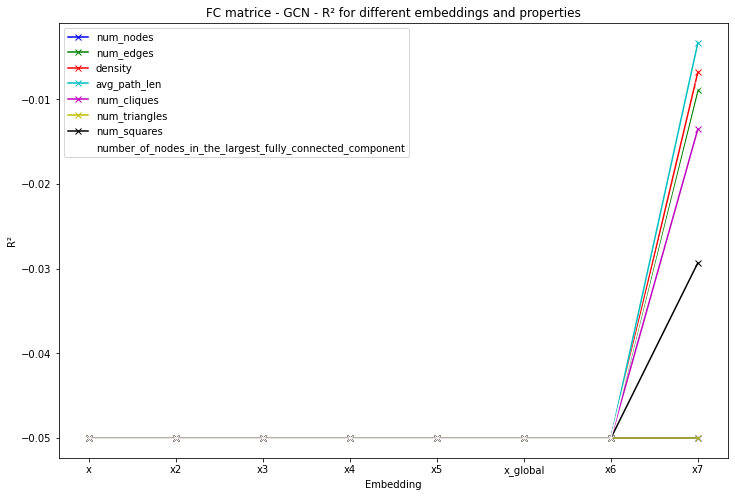

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_name)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save
plt.savefig("results/"+DATASET+"_"+MODEL+"test_R2.png")


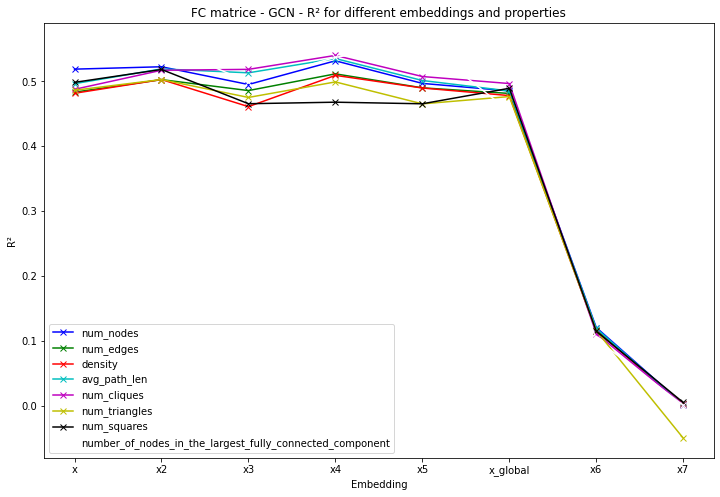

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

# Assuming results, embeddings, and other necessary variables are defined as in your context
property_names = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'num_cliques', 'num_triangles', 'num_squares', 'number_of_nodes_in_the_largest_fully_connected_component']
embeddings_names = ['x', 'x2', 'x3', 'x4', 'x5', 'x_global', 'x6', 'x7']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

plt.figure(figsize=(12, 8))

for i, property_name in enumerate(property_names):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_name)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_name, color=colors[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/'+DATASET+'_'+MODEL+'train_R2.png')


#### Test with more properties

In [ ]:
import networkx as nx
import numpy as np

def calculate_avg_path_length(G):
    if nx.is_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Use the average path length of the largest connected component for disconnected graphs
        components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        largest_component = max(components, key=len)
        return nx.average_shortest_path_length(largest_component)
    
def betweenness_centralization(G):
    n = len(G)
    betweenness = nx.betweenness_centrality(G)
    max_betweenness = max(betweenness.values())
    centralization = sum(max_betweenness - bet for bet in betweenness.values())
    if n > 2:
        centralization /= (n - 1) * (n - 2) / 2
    return centralization

def pagerank_centralization(G, alpha=0.85):
    n = len(G)
    pagerank = nx.pagerank(G, alpha=alpha)
    max_pagerank = max(pagerank.values())
    centralization = sum(max_pagerank - pr for pr in pagerank.values())
    if n > 1:
        centralization /= (n - 1)
    return centralization

def clustering_properties(G):
    average_clustering = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    return average_clustering, transitivity

def compute_graph_properties(data):
    properties = []
    for graph_data in data:
        G = nx.from_edgelist(graph_data.edge_index.t().tolist())
        
        # Number of nodes
        num_nodes = G.number_of_nodes()
        
        # Number of edges
        num_edges = G.number_of_edges()
        
        # Density
        density = nx.density(G)
        
        # Average Path Length
        avg_path_len = calculate_avg_path_length(G)
        
        # Diameter
        if nx.is_connected(G):
            diameter = nx.diameter(G)
        else:
            # Use the diameter of the largest connected component for disconnected graphs
            components = [G.subgraph(c).copy() for c in nx.connected_components(G)]
            largest_component = max(components, key=len)
            diameter = nx.diameter(largest_component)
        
        # Radius
        if nx.is_connected(G):
            radius = nx.radius(G)
        else:
            radius = nx.radius(largest_component)
        
        # Clustering Coefficient
        clustering_coeff = nx.average_clustering(G)
        
        # Transitivity
        transitivity = nx.transitivity(G)
        
        # Assortativity
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Number of Cliques
        num_cliques = len(list(nx.find_cliques(G)))
        
        # Number of Triangles
        num_triangles = sum(nx.triangles(G).values()) / 3
        
        # Number of Squares (4-cycles)
        num_squares = sum(nx.square_clustering(G).values()) / 4
        
        # Size of the Largest Connected Component
        largest_component_size = len(max(nx.connected_components(G), key=len))
        
        # Average Degree
        degrees = [d for n, d in G.degree()]
        avg_degree = np.mean(degrees)
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        avg_betweenness_centrality = np.mean(list(betweenness_centrality.values()))
        
        # Eigenvalues of the Adjacency Matrix (for spectral properties)
        eigenvalues = np.linalg.eigvals(nx.adjacency_matrix(G).todense())
        spectral_radius = max(eigenvalues)
        algebraic_connectivity = sorted(eigenvalues)[1]  # second smallest eigenvalue
        
        # Graph Laplacian Eigenvalues
        laplacian_eigenvalues = np.linalg.eigvals(nx.laplacian_matrix(G).todense())
        graph_energy = sum(abs(laplacian_eigenvalues))
        
        # Small-World-ness
        # Compare clustering coefficient and average path length with those of a random graph
        random_graph = nx.gnm_random_graph(num_nodes, num_edges)
        random_clustering_coeff = nx.average_clustering(random_graph)
        random_avg_path_len = calculate_avg_path_length(random_graph)
        small_world_coefficient = (clustering_coeff / random_clustering_coeff) / (avg_path_len / random_avg_path_len)

        # Calculate Betweenness Centralization
        betweenness_cent = betweenness_centralization(G)
        print(f"Betweenness Centralization: {betweenness_cent}")

        # Calculate PageRank Centralization
        pagerank_cent = pagerank_centralization(G)
        print(f"PageRank Centralization: {pagerank_cent}")

        # Calculate Clustering properties
        avg_clustering, transitivity = clustering_properties(G)
        print(f"Average Clustering Coefficient: {avg_clustering}")
        print(f"Transitivity: {transitivity}")
        
        properties.append((
            num_nodes,
            num_edges,
            density,
            avg_path_len,
            diameter,
            radius,
            clustering_coeff,
            transitivity,
            assortativity,
            num_cliques,
            num_triangles,
            num_squares,
            largest_component_size,
            avg_degree,
            avg_betweenness_centrality,
            spectral_radius,
            algebraic_connectivity,
            graph_energy,
            small_world_coefficient
        ))
    return properties

train_idx_list = gnn.train_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in train_idx_list]
train_properties_long = compute_graph_properties(selected_dataset)
test_idx_list = gnn.test_idx.tolist()
selected_dataset = [gnn.dataset[i] for i in test_idx_list]
test_properties_long = compute_graph_properties(selected_dataset)

#save the properties in a file
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "wb") as f:
    pkl.dump(train_properties_long, f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "wb") as f:
    pkl.dump(test_properties_long, f)



In [15]:
#load the properties
with open("results/"+DATASET+"_"+MODEL+"_train_properties_long.pkl", "rb") as f:
    train_properties_long = pkl.load(f)

with open("results/"+DATASET+"_"+MODEL+"_test_properties_long.pkl", "rb") as f:
    test_properties_long = pkl.load(f)

In [19]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)
#create a dictionary where we will store the results for each embeddings, each property
results = {}

ii = 0

for train_embedding, test_embedding in embeddings:
    input_size = train_embedding.shape[1]

    for i, property_name in enumerate(property_names_long):
        model = LinearModel(input_size, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        num_epochs = 800000  # Maximum number of epochs
        min_epochs = 1000  # Minimum number of epochs
        patience = 3000  # Number of epochs to wait for improvement
        tolerance = 1e-6  # Tolerance for considering the loss as stable

        best_loss = float('inf')
        no_improve_count = 0
        
        for epoch in range(num_epochs):
            model.train()
            optimizer.zero_grad()

            outputs = model(train_embedding).squeeze()
            target = train_y_long[:, i].squeeze()

            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 1000 == 0:  # Print every 1000 epochs
                print(f'Epoch [{epoch+1}/{num_epochs}], Property: {property_name}, Loss: {loss.item():.4f}')

            # Check for early stopping, but only after minimum epochs
            if epoch >= min_epochs:
                if loss.item() < best_loss - tolerance:
                    best_loss = loss.item()
                    no_improve_count = 0
                else:
                    no_improve_count += 1

                if no_improve_count >= patience:
                    print(f'Early stopping at epoch {epoch+1}')
                    break

        # Evaluate the model
        model.eval()
        with torch.no_grad():
            train_pred = model(train_embedding).squeeze().cpu().numpy()
            test_pred = model(test_embedding).squeeze().cpu().numpy()

            train_target = train_y_long[:, i].cpu().numpy()
            test_target = test_y_long[:, i].cpu().numpy()

            train_mse = mean_squared_error(train_target, train_pred)
            test_mse = mean_squared_error(test_target, test_pred)

            train_r2 = r2_score(train_target, train_pred)
            test_r2 = r2_score(test_target, test_pred)

            print(f'Embedding: {train_embedding.shape}')
            print(f'Property: {property_name}')
            print(f'  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')
            print(f'  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}')

            #add the results to the dictionary
            name_of_embedding = embeddings_names[ii]
            results[(name_of_embedding, property_name)] = (train_mse, test_mse, train_r2, test_r2)

    ii += 1

#save results
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "wb") as f:
    pkl.dump(results, f)

/scratch-local/tpelletreaudur.7137294/ipykernel_1069109/1310961172.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  train_y_long = torch.tensor(train_properties_long, dtype=torch.float32)
/scratch-local/tpelletreaudur.7137294/ipykernel_1069109/1310961172.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  test_y_long = torch.tensor(test_properties_long, dtype=torch.float32)


Epoch [1000/800000], Property: num_nodes, Loss: 6998.0400
Epoch [2000/800000], Property: num_nodes, Loss: 3828.3362
Epoch [3000/800000], Property: num_nodes, Loss: 2124.2310
Epoch [4000/800000], Property: num_nodes, Loss: 1253.1127
Epoch [5000/800000], Property: num_nodes, Loss: 816.1094
Epoch [6000/800000], Property: num_nodes, Loss: 574.8703
Epoch [7000/800000], Property: num_nodes, Loss: 421.8615
Epoch [8000/800000], Property: num_nodes, Loss: 317.6756
Epoch [9000/800000], Property: num_nodes, Loss: 245.8713
Epoch [10000/800000], Property: num_nodes, Loss: 195.7536
Epoch [11000/800000], Property: num_nodes, Loss: 159.6230
Epoch [12000/800000], Property: num_nodes, Loss: 132.4668
Epoch [13000/800000], Property: num_nodes, Loss: 111.6750
Epoch [14000/800000], Property: num_nodes, Loss: 95.8100
Epoch [15000/800000], Property: num_nodes, Loss: 83.6872
Epoch [16000/800000], Property: num_nodes, Loss: 74.3839
Epoch [17000/800000], Property: num_nodes, Loss: 67.2560
Epoch [18000/800000], P

KeyboardInterrupt: 

In [20]:
with open("results/"+DATASET+"_"+MODEL+"_results_limited_cv_long.pkl", "rb") as f:
    results = pkl.load(f)

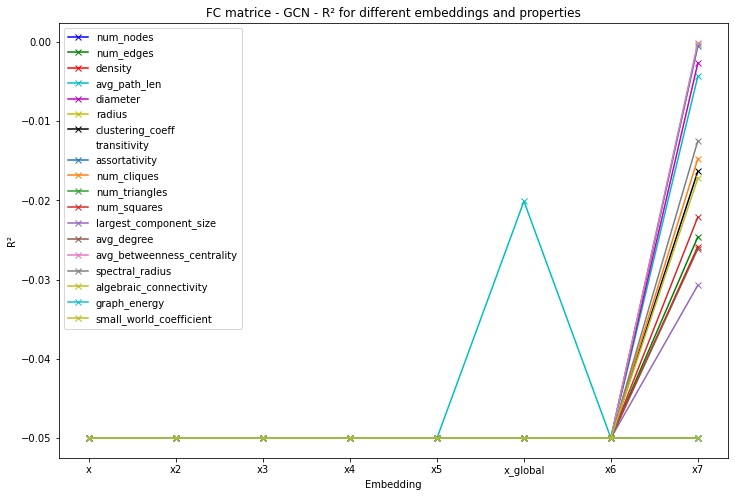

<Figure size 432x288 with 0 Axes>

In [23]:
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']
colors_long = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:olive', 'tab:cyan']

plt.figure(figsize=(12, 8))

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        test_r2 = results[(name_of_embedding, property_names_long)][3]
        if test_r2 < -0.05:  # Handle negative R² values
            test_r2 = -0.05
        x_points.append(j)
        y_points.append(test_r2)
    
    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/"+DATASET+"_"+MODEL+"_test_R2_plot_long.png', dpi=300, bbox_inches='tight')

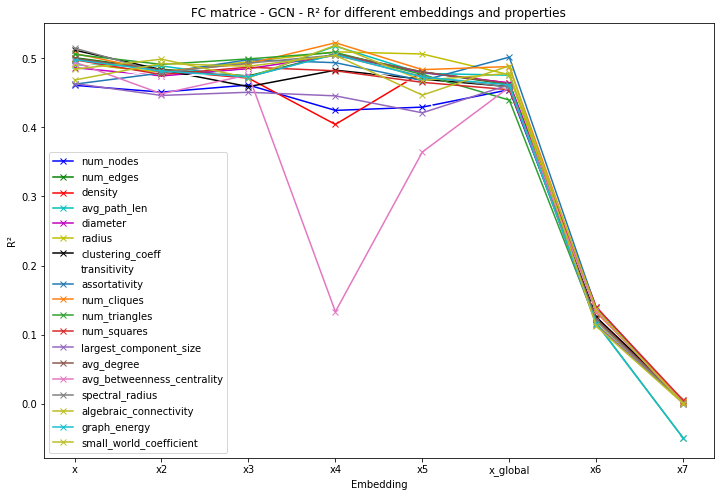

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(12, 8))
property_names_long = ['num_nodes', 'num_edges', 'density', 'avg_path_len', 'diameter', 'radius', 'clustering_coeff', 'transitivity', 'assortativity', 'num_cliques', 'num_triangles', 'num_squares', 'largest_component_size', 'avg_degree', 'avg_betweenness_centrality', 'spectral_radius', 'algebraic_connectivity', 'graph_energy', 'small_world_coefficient']

for i, property_names_long in enumerate(property_names_long):
    x_points = []
    y_points = []
    for j, embedding in enumerate(embeddings):
        name_of_embedding = embeddings_names[j]
        train_r2 = results[(name_of_embedding, property_names_long)][2]
        if train_r2 < -0.05:  # Handle negative R² values
            train_r2 = -0.05
        x_points.append(j)
        y_points.append(train_r2)

    # Plotting the line for the current property
    plt.plot(x_points, y_points, label=property_names_long, color=colors_long[i], marker='x')

plt.xticks(range(len(embeddings)), embeddings_names)
plt.xlabel('Embedding')
plt.ylabel('R²')
plt.legend()
plt.title('FC matrice - GCN - R² for different embeddings and properties')
plt.show()

#save the plot
plt.savefig('results/"+DATASET+"_"+MODEL+"_train_R2_plot_long.png', dpi=300, bbox_inches='tight')